# GPU

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Mon Jan 11 08:28:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    12W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# CFG

In [2]:
CONFIG_NAME = 'config07.yml'
TITLE = '07t-resnext50-epoch100'

In [3]:
! git clone https://github.com/raijin0704/cassava.git
# ====================================================
# CFG
# ====================================================
import yaml

CONFIG_PATH = f'./cassava/config/{CONFIG_NAME}'
with open(CONFIG_PATH) as f:
    config = yaml.load(f)

INFO = config['info']
TAG = config['tag']
CFG = config['cfg']

CFG['train'] = True
CFG['inference'] = False

# CFG['debug'] = True

if CFG['debug']:
    CFG['epochs'] = 1


assert INFO['TITLE'] == TITLE

Cloning into 'cassava'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 67 (delta 42), reused 10 (delta 5), pack-reused 0
Unpacking objects: 100% (67/67), done.


# colab & kaggle notebookでの環境面の処理

## colab

In [4]:
def _colab_kaggle_authority():
    from googleapiclient.discovery import build
    import io, os
    from googleapiclient.http import MediaIoBaseDownload

    drive_service = build('drive', 'v3')
    results = drive_service.files().list(
            q="name = 'kaggle.json'", fields="files(id)").execute()
    kaggle_api_key = results.get('files', [])

    filename = "/root/.kaggle/kaggle.json"
    os.makedirs(os.path.dirname(filename), exist_ok=True)

    request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
    fh = io.FileIO(filename, 'wb')
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    while done is False:
        status, done = downloader.next_chunk()
        print("Download %d%%." % int(status.progress() * 100))
    os.chmod(filename, 600)


def process_colab():
    import subprocess
    
    # ドライブのマウント
    from google.colab import drive
    drive.mount('/content/drive')

    # Google Cloudの権限設定
    from google.colab import auth
    auth.authenticate_user()

    # kaggle設定
    # _colab_kaggle_authority()
    # subprocess.run('pip install --upgrade --force-reinstall --no-deps kaggle'.split(' '))

    # ライブラリ関係
    subprocess.run('pip install --upgrade opencv-python'.split(' '))
    subprocess.run('pip install --upgrade albumentations'.split(' '))
    subprocess.run('pip install timm'.split(' '))

    # 各種pathの設定
    # DATA_PATH = '/content/drive/Shareddrives/便利用/kaggle/cassava/input/'
    # ! cp -r /content/drive/Shareddrives/便利用/kaggle/cassava/input /content/input
    DATA_PATH = '/content/input/'
    OUTPUT_DIR = './output/'
    NOTEBOOK_PATH = f'/content/drive/MyDrive/Colab Notebooks/{TITLE}.ipynb'

    return DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH

## kaggle notebook

In [5]:
def _kaggle_gcp_authority():
    from kaggle_secrets import UserSecretsClient
    user_secrets = UserSecretsClient()
    user_credential = user_secrets.get_gcloud_credential()
    user_secrets.set_tensorflow_credential(user_credential)

def process_kaggle():
    # GCP設定
    _kaggle_gcp_authority()

    # 各種pathの設定
    DATA_PATH = '../input/cassava-leaf-disease-classification/'
    OUTPUT_DIR = './'
    NOTEBOOK_PATH = './__notebook__.ipynb'
    # system path
    import sys
    sys.path.append('../input/pytorch-image-models/pytorch-image-models-master')

    return DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH

## 共通

In [6]:
def process_common():
    # ライブラリ関係
    import subprocess
    subprocess.run('pip install mlflow'.split(' '))

    # 環境変数
    import os
    os.environ["GCLOUD_PROJECT"] = INFO['PROJECT_ID']

In [7]:
try:
    from google.colab import auth
except ImportError:
    DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH = process_kaggle()
else:
    DATA_PATH, OUTPUT_DIR, NOTEBOOK_PATH = process_colab()
finally:
    process_common()

Mounted at /content/drive


In [8]:
!rm -r /content/input

rm: cannot remove '/content/input': No such file or directory


In [9]:
import os
try:
    from google.colab import auth
except ImportError:
    pass
else:
    ! cp /content/drive/Shareddrives/便利用/kaggle/cassava/input.zip /content/input.zip
    ! unzip input.zip
    ! rm input.zip
train_num = len(os.listdir(DATA_PATH+"/train_images"))
assert train_num == 21397

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: input/train_images/1137739472.jpg  
  inflating: input/train_images/441313044.jpg  
  inflating: input/train_images/982733151.jpg  
  inflating: input/train_images/3643480526.jpg  
  inflating: input/train_images/2440664696.jpg  
  inflating: input/train_images/370523815.jpg  
  inflating: input/train_images/1125560878.jpg  
  inflating: input/train_images/3303165486.jpg  
  inflating: input/train_images/510873412.jpg  
  inflating: input/train_images/550429661.jpg  
  inflating: input/train_images/1127352598.jpg  
  inflating: input/train_images/3767196717.jpg  
  inflating: input/train_images/25671501.jpg  
  inflating: input/train_images/2296550892.jpg  
  inflating: input/train_images/754482252.jpg  
  inflating: input/train_images/3714169299.jpg  
  inflating: input/train_images/127776052.jpg  
  inflating: input/train_images/3761357668.jpg  
  inflating: input/train_images/996534381.jpg  
  inflating: input/train_images/255701322.jpg  

# Library

In [10]:
# ====================================================
# Library
# ====================================================
import os
import datetime
import math
import time
import random
import glob
import shutil
from pathlib import Path
from contextlib import contextmanager
from collections import defaultdict, Counter

import scipy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from tqdm.auto import tqdm
from functools import partial

import cv2
from PIL import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, SGD
import torchvision.models as models
from torch.nn.parameter import Parameter
from torch.utils.data import DataLoader, Dataset
from torch.optim.lr_scheduler import CosineAnnealingWarmRestarts, CosineAnnealingLR, ReduceLROnPlateau

from albumentations import (
    Compose, OneOf, Normalize, Resize, RandomResizedCrop, RandomCrop, HorizontalFlip, VerticalFlip, 
    RandomBrightness, RandomContrast, RandomBrightnessContrast, Rotate, ShiftScaleRotate, Cutout, 
    IAAAdditiveGaussianNoise, Transpose
    )
from albumentations.pytorch import ToTensorV2
from albumentations import ImageOnlyTransform

import timm
import mlflow

import warnings 
warnings.filterwarnings('ignore')

if CFG['apex']:
    from apex import amp

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
start_time = datetime.datetime.now()
start_time_str = start_time.strftime('%m%d%H%M')

# Directory settings

In [11]:
# ====================================================
# Directory settings
# ====================================================
import os

if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# save basic files

In [12]:
# with open(f'{OUTPUT_DIR}/{start_time_str}_TAG.json', 'w') as f:
#     json.dump(TAG, f, indent=4)
    
# with open(f'{OUTPUT_DIR}/{start_time_str}_CFG.json', 'w') as f:
#     json.dump(CFG, f, indent=4)

import shutil
notebook_path = f'{OUTPUT_DIR}/{start_time_str}_{TITLE}.ipynb'
shutil.copy2(NOTEBOOK_PATH, notebook_path)

'./output//01110832_07t-resnext50-epoch100.ipynb'

# Data Loading

In [13]:
train = pd.read_csv(f'{DATA_PATH}/train.csv')
test = pd.read_csv(f'{DATA_PATH}/sample_submission.csv')
label_map = pd.read_json(f'{DATA_PATH}/label_num_to_disease_map.json', 
                         orient='index')

if CFG['debug']:
    train = train.sample(n=1000, random_state=CFG['seed']).reset_index(drop=True)

# Utils

In [14]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


@contextmanager
def timer(name):
    t0 = time.time()
    LOGGER.info(f'[{name}] start')
    yield
    LOGGER.info(f'[{name}] done in {time.time() - t0:.0f} s.')


def init_logger(log_file=OUTPUT_DIR+'train.log'):
    from logging import getLogger, FileHandler,  Formatter,  StreamHandler
    from logging import INFO as INFO_
    logger = getLogger(__name__)
    logger.setLevel(INFO_)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=log_file)
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger_path = OUTPUT_DIR+f'{start_time_str}_train.log'
LOGGER = init_logger(logger_path)


def seed_torch(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_torch(seed=CFG['seed'])


class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, save_path='checkpoint.pt',
                 counter=0, best_score=None):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            save_path (str): Directory for saving a model.
                             Default: "'checkpoint.pt'"
        """
        self.patience = patience
        self.verbose = verbose
        self.save_path = save_path
        self.counter = counter
        self.best_score = best_score
        self.early_stop = False
        self.val_loss_min = np.Inf

    def __call__(self, val_loss, model, preds, epoch):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model, preds, epoch)
        # elif score >= self.best_score:
        #     self.best_score = score
        #     self.save_checkpoint(val_loss, model, preds, epoch)
        #     self.counter = 0
        # nanになったら学習ストップ
        elif math.isnan(score):
            self.early_stop = True
        # else:
        #     self.counter += 1
        #     if self.verbose:
        #         print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
        #     if self.counter >= self.patience:
        #         self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model, preds, epoch)
            self.counter = 0

    def save_checkpoint(self, val_loss, model, preds, epoch):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.10f} --> {val_loss:.10f}).  Saving model ...')
        torch.save({'model': model.state_dict(), 'preds': preds, 
                    'epoch' : epoch, 'best_score' : self.best_score, 'counter' : self.counter},
                   self.save_path)
        self.val_loss_min = val_loss

# CV split

In [15]:
folds = train.copy()
Fold = StratifiedKFold(n_splits=CFG['n_fold'], shuffle=True, random_state=CFG['seed'])
for n, (train_index, val_index) in enumerate(Fold.split(folds, folds[CFG['target_col']])):
    folds.loc[val_index, 'fold'] = int(n)
folds['fold'] = folds['fold'].astype(int)
print(folds.groupby(['fold', CFG['target_col']]).size())

fold  label
0     0         218
      1         438
      2         477
      3        2631
      4         516
1     0         218
      1         438
      2         477
      3        2631
      4         516
2     0         217
      1         438
      2         477
      3        2632
      4         515
3     0         217
      1         438
      2         477
      3        2632
      4         515
4     0         217
      1         437
      2         478
      3        2632
      4         515
dtype: int64


# Dataset

In [16]:
# ====================================================
# Dataset
# ====================================================
class TrainDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['image_id'].values
        self.labels = df['label'].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = f'{DATA_PATH}/train_images/{file_name}'
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        label = torch.tensor(self.labels[idx]).long()
        return image, label
    

class TestDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.file_names = df['image_id'].values
        self.transform = transform
        
    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        file_path = f'{DATA_PATH}/test_images/{file_name}'
        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
        return image

In [17]:
# train_dataset = TrainDataset(train, transform=None)

# for i in range(1):
#     image, label = train_dataset[i]
#     plt.imshow(image)
#     plt.title(f'label: {label}')
#     plt.show() 

# Transforms

In [18]:
# ====================================================
# Transforms
# ====================================================
def get_transforms(*, data):
    
    if data == 'train':
        return Compose([
            #Resize(CFG['size'], CFG['size']),
            RandomResizedCrop(CFG['size'], CFG['size']),
            Transpose(p=0.5),
            HorizontalFlip(p=0.5),
            VerticalFlip(p=0.5),
            ShiftScaleRotate(p=0.5),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])

    elif data == 'valid':
        return Compose([
            Resize(CFG['size'], CFG['size']),
            Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225],
            ),
            ToTensorV2(),
        ])

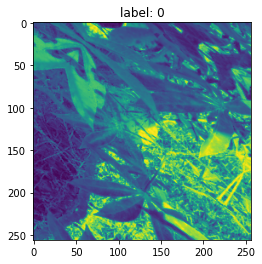

In [19]:
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))

for i in range(1):
    image, label = train_dataset[i]
    plt.imshow(image[0])
    plt.title(f'label: {label}')
    plt.show() 

# Bi-tempered logistic loss

In [20]:
def log_t(u, t):
    """Compute log_t for `u'."""
    if t==1.0:
        return u.log()
    else:
        return (u.pow(1.0 - t) - 1.0) / (1.0 - t)

def exp_t(u, t):
    """Compute exp_t for `u'."""
    if t==1:
        return u.exp()
    else:
        return (1.0 + (1.0-t)*u).relu().pow(1.0 / (1.0 - t))

def compute_normalization_fixed_point(activations, t, num_iters):

    """Returns the normalization value for each example (t > 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same shape as activation with the last dimension being 1.
    """
    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations_step_0 = activations - mu

    normalized_activations = normalized_activations_step_0

    for _ in range(num_iters):
        logt_partition = torch.sum(
                exp_t(normalized_activations, t), -1, keepdim=True)
        normalized_activations = normalized_activations_step_0 * \
                logt_partition.pow(1.0-t)

    logt_partition = torch.sum(
            exp_t(normalized_activations, t), -1, keepdim=True)
    normalization_constants = - log_t(1.0 / logt_partition, t) + mu

    return normalization_constants

def compute_normalization_binary_search(activations, t, num_iters):

    """Returns the normalization value for each example (t < 1.0).
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (< 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """

    mu, _ = torch.max(activations, -1, keepdim=True)
    normalized_activations = activations - mu

    effective_dim = \
        torch.sum(
                (normalized_activations > -1.0 / (1.0-t)).to(torch.int32),
            dim=-1, keepdim=True).to(activations.dtype)

    shape_partition = activations.shape[:-1] + (1,)
    lower = torch.zeros(shape_partition, dtype=activations.dtype, device=activations.device)
    upper = -log_t(1.0/effective_dim, t) * torch.ones_like(lower)

    for _ in range(num_iters):
        logt_partition = (upper + lower)/2.0
        sum_probs = torch.sum(
                exp_t(normalized_activations - logt_partition, t),
                dim=-1, keepdim=True)
        update = (sum_probs < 1.0).to(activations.dtype)
        lower = torch.reshape(
                lower * update + (1.0-update) * logt_partition,
                shape_partition)
        upper = torch.reshape(
                upper * (1.0 - update) + update * logt_partition,
                shape_partition)

    logt_partition = (upper + lower)/2.0
    return logt_partition + mu

class ComputeNormalization(torch.autograd.Function):
    """
    Class implementing custom backward pass for compute_normalization. See compute_normalization.
    """
    @staticmethod
    def forward(ctx, activations, t, num_iters):
        if t < 1.0:
            normalization_constants = compute_normalization_binary_search(activations, t, num_iters)
        else:
            normalization_constants = compute_normalization_fixed_point(activations, t, num_iters)

        ctx.save_for_backward(activations, normalization_constants)
        ctx.t=t
        return normalization_constants

    @staticmethod
    def backward(ctx, grad_output):
        activations, normalization_constants = ctx.saved_tensors
        t = ctx.t
        normalized_activations = activations - normalization_constants 
        probabilities = exp_t(normalized_activations, t)
        escorts = probabilities.pow(t)
        escorts = escorts / escorts.sum(dim=-1, keepdim=True)
        grad_input = escorts * grad_output
        
        return grad_input, None, None

def compute_normalization(activations, t, num_iters=5):
    """Returns the normalization value for each example. 
    Backward pass is implemented.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      num_iters: Number of iterations to run the method.
    Return: A tensor of same rank as activation with the last dimension being 1.
    """
    return ComputeNormalization.apply(activations, t, num_iters)

def tempered_sigmoid(activations, t, num_iters = 5):
    """Tempered sigmoid function.
    Args:
      activations: Activations for the positive class for binary classification.
      t: Temperature tensor > 0.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_probabilities = tempered_softmax(internal_activations, t, num_iters)
    return internal_probabilities[..., 0]


def tempered_softmax(activations, t, num_iters=5):
    """Tempered softmax function.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      t: Temperature > 1.0.
      num_iters: Number of iterations to run the method.
    Returns:
      A probabilities tensor.
    """
    if t == 1.0:
        return activations.softmax(dim=-1)

    normalization_constants = compute_normalization(activations, t, num_iters)
    return exp_t(activations - normalization_constants, t)

def bi_tempered_binary_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing = 0.0,
        num_iters=5,
        reduction='mean'):

    """Bi-Tempered binary logistic loss.
    Args:
      activations: A tensor containing activations for class 1.
      labels: A tensor with shape as activations, containing probabilities for class 1
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing
      num_iters: Number of iterations to run the method.
    Returns:
      A loss tensor.
    """
    internal_activations = torch.stack([activations,
        torch.zeros_like(activations)],
        dim=-1)
    internal_labels = torch.stack([labels.to(activations.dtype),
        1.0 - labels.to(activations.dtype)],
        dim=-1)
    return bi_tempered_logistic_loss(internal_activations, 
            internal_labels,
            t1,
            t2,
            label_smoothing = label_smoothing,
            num_iters = num_iters,
            reduction = reduction)

def bi_tempered_logistic_loss(activations,
        labels,
        t1,
        t2,
        label_smoothing=0.0,
        num_iters=5,
        reduction = 'mean'):

    """Bi-Tempered Logistic Loss.
    Args:
      activations: A multi-dimensional tensor with last dimension `num_classes`.
      labels: A tensor with shape and dtype as activations (onehot), 
        or a long tensor of one dimension less than activations (pytorch standard)
      t1: Temperature 1 (< 1.0 for boundedness).
      t2: Temperature 2 (> 1.0 for tail heaviness, < 1.0 for finite support).
      label_smoothing: Label smoothing parameter between [0, 1). Default 0.0.
      num_iters: Number of iterations to run the method. Default 5.
      reduction: ``'none'`` | ``'mean'`` | ``'sum'``. Default ``'mean'``.
        ``'none'``: No reduction is applied, return shape is shape of
        activations without the last dimension.
        ``'mean'``: Loss is averaged over minibatch. Return shape (1,)
        ``'sum'``: Loss is summed over minibatch. Return shape (1,)
    Returns:
      A loss tensor.
    """

    if len(labels.shape)<len(activations.shape): #not one-hot
        labels_onehot = torch.zeros_like(activations)
        labels_onehot.scatter_(1, labels[..., None], 1)
    else:
        labels_onehot = labels

    if label_smoothing > 0:
        num_classes = labels_onehot.shape[-1]
        labels_onehot = ( 1 - label_smoothing * num_classes / (num_classes - 1) ) \
                * labels_onehot + \
                label_smoothing / (num_classes - 1)

    probabilities = tempered_softmax(activations, t2, num_iters)

    loss_values = labels_onehot * log_t(labels_onehot + 1e-10, t1) \
            - labels_onehot * log_t(probabilities, t1) \
            - labels_onehot.pow(2.0 - t1) / (2.0 - t1) \
            + probabilities.pow(2.0 - t1) / (2.0 - t1)
    loss_values = loss_values.sum(dim = -1) #sum over classes

    if reduction == 'none':
        return loss_values
    if reduction == 'sum':
        return loss_values.sum()
    if reduction == 'mean':
        return loss_values.mean()

# MODEL

In [21]:
# ====================================================
# MODEL
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, model_name, pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        if hasattr(self.model, 'classifier'):
            n_features = self.model.classifier.in_features
            self.model.classifier = nn.Linear(n_features, CFG['target_size'])
        elif hasattr(self.model, 'fc'):
            n_features = self.model.fc.in_features
            self.model.fc = nn.Linear(n_features, CFG['target_size'])

    def forward(self, x):
        x = self.model(x)
        return x

In [22]:
model = CustomModel(model_name=TAG['model_name'], pretrained=False)
train_dataset = TrainDataset(train, transform=get_transforms(data='train'))
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True,
                          num_workers=4, pin_memory=True, drop_last=True)

for image, label in train_loader:
    output = model(image)
    print(output)
    break

tensor([[ 0.1379, -0.0437,  0.0715,  0.2726, -0.0931],
        [ 0.1407,  0.1553,  0.0661,  0.6412,  0.1147],
        [ 0.1008, -0.0071,  0.0307,  0.3932, -0.0678],
        [ 0.1247,  0.0810,  0.0957,  0.5489,  0.1670]],
       grad_fn=<AddmmBackward>)


# Helper functions

In [23]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))




In [24]:
# ====================================================
# loss
# ====================================================
def get_loss(criterion, y_preds, labels):
    if TAG['criterion']=='CrossEntropyLoss':
        loss = criterion(y_preds, labels)
    elif TAG['criterion'] == 'bi_tempered_logistic_loss':
        loss = criterion(y_preds, labels, t1=CFG['bi_tempered_loss_t1'], t2=CFG['bi_tempered_loss_t2'])
    return loss

In [25]:
# ====================================================
# Helper functions
# ====================================================
def train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to train mode
    model.train()
    start = end = time.time()
    global_step = 0
    for step, (images, labels) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        y_preds = model(images)
        loss = get_loss(criterion, y_preds, labels)
        # record loss
        losses.update(loss.item(), batch_size)
        if CFG['gradient_accumulation_steps'] > 1:
            loss = loss / CFG['gradient_accumulation_steps']
        if CFG['apex']:
            with amp.scale_loss(loss, optimizer) as scaled_loss:
                scaled_loss.backward()
        else:
            loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG['max_grad_norm'])
        if (step + 1) % CFG['gradient_accumulation_steps'] == 0:
            optimizer.step()
            optimizer.zero_grad()
            global_step += 1
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG['print_freq'] == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  #'LR: {lr:.6f}  '
                  .format(
                   epoch+1, step, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(train_loader)),
                   grad_norm=grad_norm,
                   #lr=scheduler.get_lr()[0],
                   ))
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    scores = AverageMeter()
    # switch to evaluation mode
    model.eval()
    preds = []
    start = end = time.time()
    for step, (images, labels) in enumerate(valid_loader):
        # measure data loading time
        data_time.update(time.time() - end)
        images = images.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        # compute loss
        with torch.no_grad():
            y_preds = model(images)
        loss = get_loss(criterion, y_preds, labels)
        losses.update(loss.item(), batch_size)
        # record accuracy
        preds.append(y_preds.softmax(1).to('cpu').numpy())
        if CFG['gradient_accumulation_steps'] > 1:
            loss = loss / CFG['gradient_accumulation_steps']
        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()
        if step % CFG['print_freq'] == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(
                   step, len(valid_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses,
                   remain=timeSince(start, float(step+1)/len(valid_loader)),
                   ))
    predictions = np.concatenate(preds)
    return losses.avg, predictions


def inference(model, states, test_loader, device):
    model.to(device)
    tk0 = tqdm(enumerate(test_loader), total=len(test_loader))
    probs = []
    for i, (images) in tk0:
        images = images.to(device)
        avg_preds = []
        for state in states:
            # model.load_state_dict(state['model'])
            model.load_state_dict(state)
            model.eval()
            with torch.no_grad():
                y_preds = model(images)
            avg_preds.append(y_preds.softmax(1).to('cpu').numpy())
        avg_preds = np.mean(avg_preds, axis=0)
        probs.append(avg_preds)
    probs = np.concatenate(probs)
    return probs

# Train loop

In [26]:
# ====================================================
# scheduler 
# ====================================================
def get_scheduler(optimizer):
    if TAG['scheduler']=='ReduceLROnPlateau':
        scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG['factor'], patience=CFG['patience'], verbose=True, eps=CFG['eps'])
    elif TAG['scheduler']=='CosineAnnealingLR':
        scheduler = CosineAnnealingLR(optimizer, T_max=CFG['T_max'], eta_min=CFG['min_lr'], last_epoch=-1)
    elif TAG['scheduler']=='CosineAnnealingWarmRestarts':
        scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG['T_0'], T_mult=1, eta_min=CFG['min_lr'], last_epoch=-1)
    return scheduler

# ====================================================
# criterion
# ====================================================
def get_criterion():
    if TAG['criterion']=='CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
    elif TAG['criterion'] == 'bi_tempered_logistic_loss':
        criterion = bi_tempered_logistic_loss
    return criterion

In [27]:
# ====================================================
# Train loop
# ====================================================
def train_loop(folds, fold):

    LOGGER.info(f"========== fold: {fold} training ==========")
    if not CFG['debug']:
        mlflow.set_tag('running.fold', str(fold))
    # ====================================================
    # loader
    # ====================================================
    trn_idx = folds[folds['fold'] != fold].index
    val_idx = folds[folds['fold'] == fold].index

    train_folds = folds.loc[trn_idx].reset_index(drop=True)
    valid_folds = folds.loc[val_idx].reset_index(drop=True)

    train_dataset = TrainDataset(train_folds, 
                                 transform=get_transforms(data='train'))
    valid_dataset = TrainDataset(valid_folds, 
                                 transform=get_transforms(data='valid'))

    train_loader = DataLoader(train_dataset, 
                              batch_size=CFG['batch_size'], 
                              shuffle=True, 
                              num_workers=CFG['num_workers'], pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset, 
                              batch_size=CFG['batch_size'], 
                              shuffle=False, 
                              num_workers=CFG['num_workers'], pin_memory=True, drop_last=False)

    # ====================================================
    # model & optimizer & criterion
    # ====================================================
    model = CustomModel(TAG['model_name'], pretrained=True)
    model.to(device)
    # 学習途中の重みがあれば読み込み
    if os.path.isfile(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth'):
        state = torch.load(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth')
        model.load_state_dict(state['model'])
        epoch_start = state['epoch']+1
        er_best_score = state['best_score']
        er_counter = state['counter']
        # epoch_start = 10
        # er_best_score = 0
        # er_counter = 1
        LOGGER.info(f'Retrain model in epoch:{epoch_start}, best_score:{er_best_score:.3f}, counter:{er_counter}')
    else:
        epoch_start = 0
        er_best_score = None
        er_counter = 0

    optimizer = Adam(model.parameters(), lr=CFG['lr'], weight_decay=CFG['weight_decay'], amsgrad=False)
    scheduler = get_scheduler(optimizer)
    criterion = get_criterion()

    # ====================================================
    # apex
    # ====================================================
    if CFG['apex']:
        model, optimizer = amp.initialize(model, optimizer, opt_level='O1', verbosity=0)

    # ====================================================
    # loop
    # ====================================================
    # best_score = 0.
    # best_loss = np.inf
    
    early_stopping = EarlyStopping(
                            patience=CFG['early_stopping_round'], 
                            verbose=True,
                            save_path=OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth',
                            counter=er_counter, best_score=er_best_score)
    
    for epoch in range(epoch_start, CFG['epochs']):
        
        start_time = time.time()
        
        # train
        avg_loss = train_fn(train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, preds = valid_fn(valid_loader, model, criterion, device)
        valid_labels = valid_folds[CFG['target_col']].values
        
        # early stopping
        early_stopping(avg_val_loss, model, preds, epoch)
        if early_stopping.early_stop:
            print(f'Epoch {epoch+1} - early stopping')
            break
        
        if isinstance(scheduler, ReduceLROnPlateau):
            scheduler.step(avg_val_loss)
        elif isinstance(scheduler, CosineAnnealingLR):
            scheduler.step()
        elif isinstance(scheduler, CosineAnnealingWarmRestarts):
            scheduler.step()

        # scoring
        score = get_score(valid_labels, preds.argmax(1))

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Accuracy: {score}')
        
        # log mlflow
        if not CFG['debug']:
            mlflow.log_metric(f"fold{fold} avg_train_loss", avg_loss, step=epoch)
            mlflow.log_metric(f"fold{fold} avg_valid_loss", avg_val_loss, step=epoch)
            mlflow.log_metric(f"fold{fold} score", score, step=epoch)
            mlflow.log_metric(f"fold{fold} lr", scheduler.get_last_lr()[0], step=epoch)
            mlflow.log_artifact(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth')
    
    check_point = torch.load(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth')
    valid_folds[[str(c) for c in range(5)]] = check_point['preds']
    valid_folds['preds'] = check_point['preds'].argmax(1)

    return valid_folds

In [28]:
# ====================================================
# main
# ====================================================
def get_result(result_df):
    preds = result_df['preds'].values
    labels = result_df[CFG['target_col']].values
    score = get_score(labels, preds)
    LOGGER.info(f'Score: {score:<.5f}')
    
    return score

    

def main():

    """
    Prepare: 1.train  2.test  3.submission  4.folds
    """
    
    if CFG['train']:
        # train 
        oof_df = pd.DataFrame()
        for fold in range(CFG['n_fold']):
            if fold in CFG['trn_fold']:
                _oof_df = train_loop(folds, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                _ = get_result(_oof_df)
        # CV result
        LOGGER.info(f"========== CV ==========")
        score = get_result(oof_df)
        # save result
        oof_df.to_csv(OUTPUT_DIR+'oof_df.csv', index=False)
        # log mlflow
        if not CFG['debug']:
            mlflow.log_metric('oof score', score)
            mlflow.delete_tag('running.fold')
            mlflow.log_artifact(OUTPUT_DIR+'oof_df.csv')
    
    if CFG['inference']:
        # inference
        model = CustomModel(TAG['model_name'], pretrained=False)
        states = [torch.load(OUTPUT_DIR+f'{TAG["model_name"]}_fold{fold}_best.pth') for fold in CFG['trn_fold']]
        test_dataset = TestDataset(test, transform=get_transforms(data='valid'))
        test_loader = DataLoader(test_dataset, batch_size=CFG['batch_size'], shuffle=False, 
                                 num_workers=CFG['num_workers'], pin_memory=True)
        predictions = inference(model, states, test_loader, device)
        # submission
        test['label'] = predictions.argmax(1)
        test[['image_id', 'label']].to_csv(OUTPUT_DIR+'submission.csv', index=False)

# rerun

In [29]:
def _load_save_point(run_id):
    # どこで中断したか取得
    # stop_fold = int(mlflow.get_run(run_id=run_id).to_dictionary()['data']['tags']['running.fold'])
    stop_fold = 0
    # 学習対象のfoldを変更
    CFG['trn_fold'] = [fold for fold in CFG['trn_fold'] if fold>=stop_fold]
    # 学習済みモデルがあれば.pthファイルを取得(学習中も含む)
    client = mlflow.tracking.MlflowClient()
    artifacts = [artifact for artifact in client.list_artifacts(run_id) if ".pth" in artifact.path]
    for artifact in artifacts:
        client.download_artifacts(run_id, artifact.path, OUTPUT_DIR)


def check_have_run():
    results = mlflow.search_runs(INFO['EXPERIMENT_ID'])
    run_id_list = results[results['tags.mlflow.runName']==TITLE]['run_id'].tolist()
    # 初めて実行する場合
    if len(run_id_list) == 0:
        run_id = None
    # 既に実行されている場合
    else:
        assert len(run_id_list)==1
        run_id = run_id_list[0]
        _load_save_point(run_id)

    return run_id

In [ ]:
if __name__ == '__main__':
    if CFG['debug']:
        main()
    else:
        mlflow.set_tracking_uri(INFO['TRACKING_URI'])
        mlflow.set_experiment('single model')
        # 既に実行済みの場合は続きから実行する
        run_id = check_have_run()
        with mlflow.start_run(run_id=run_id, run_name=TITLE):
            if run_id is None:
                mlflow.log_artifact(CONFIG_PATH)
                mlflow.log_param('device', device)
                mlflow.set_tags(TAG)
                mlflow.log_params(CFG)
            mlflow.log_artifact(notebook_path)
            main()
            mlflow.log_artifacts(OUTPUT_DIR)
            shutil.copytree(OUTPUT_DIR, f'{INFO["SHARE_DRIVE_PATH"]}/{TITLE}')
            shutil.copy2(CONFIG_PATH, f'{INFO["SHARE_DRIVE_PATH"]}/{TITLE}/{CONFIG_NAME}')

========== fold: 0 training ==========
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnext50_32x4d_ra-d733960d.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d_ra-d733960d.pth
Retrain model in epoch:61, best_score:-0.147, counter:0


Epoch: [62][0/534] Data 1.365 (1.365) Elapsed 0m 2s (remain 19m 42s) Loss: 0.0519(0.0519) Grad: 1.3679  
Epoch: [62][100/534] Data 0.000 (0.014) Elapsed 0m 58s (remain 4m 11s) Loss: 0.0620(0.0432) Grad: 1.6462  
Epoch: [62][200/534] Data 0.000 (0.007) Elapsed 1m 58s (remain 3m 16s) Loss: 0.0379(0.0428) Grad: 0.3884  
Epoch: [62][300/534] Data 0.000 (0.005) Elapsed 2m 58s (remain 2m 18s) Loss: 0.0401(0.0428) Grad: 0.8555  
Epoch: [62][400/534] Data 0.000 (0.004) Elapsed 3m 58s (remain 1m 19s) Loss: 0.0737(0.0425) Grad: 0.8067  
Epoch: [62][500/534] Data 0.000 (0.003) Elapsed 4m 59s (remain 0m 19s) Loss: 0.0433(0.0430) Grad: 2.3738  
Epoch: [62][533/534] Data 0.000 (0.003) Elapsed 5m 19s (remain 0m 0s) Loss: 0.0583(0.0428) Grad: 3.1204  
EVAL: [0/134] Data 1.300 (1.300) Elapsed 0m 1s (remain 3m 14s) Loss: 0.2389(0.2389) 
EVAL: [100/134] Data 0.494 (0.132) Elapsed 0m 29s (remain 0m 9s) Loss: 0.2016(0.1435) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1937(0.14

Epoch 62 - avg_train_loss: 0.0428  avg_val_loss: 0.1455  time: 357s
Epoch 62 - Accuracy: 0.8560747663551402


Epoch: [63][0/534] Data 1.211 (1.211) Elapsed 0m 1s (remain 17m 25s) Loss: 0.0143(0.0143) Grad: 0.9107  
Epoch: [63][100/534] Data 0.000 (0.012) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0487(0.0438) Grad: 0.9925  
Epoch: [63][200/534] Data 0.000 (0.006) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0586(0.0447) Grad: 2.5012  
Epoch: [63][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0742(0.0429) Grad: 2.4011  
Epoch: [63][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0296(0.0435) Grad: 1.1196  
Epoch: [63][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0262(0.0434) Grad: 2.2426  
Epoch: [63][533/534] Data 0.000 (0.002) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0300(0.0435) Grad: 1.9385  
EVAL: [0/134] Data 1.172 (1.172) Elapsed 0m 1s (remain 2m 56s) Loss: 0.2192(0.2192) 
EVAL: [100/134] Data 0.379 (0.132) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1327(0.1567) 
EVAL: [133/134] Data 0.000 (0.123) Elapsed 0m 37s (remain 0m 0s) Loss: 0.2904(0.1536) 


Epoch 63 - avg_train_loss: 0.0435  avg_val_loss: 0.1536  time: 362s
Epoch 63 - Accuracy: 0.8474299065420561


Epoch: [64][0/534] Data 1.442 (1.442) Elapsed 0m 2s (remain 19m 40s) Loss: 0.0192(0.0192) Grad: 1.6872  
Epoch: [64][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0685(0.0407) Grad: 0.8004  
Epoch: [64][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0454(0.0416) Grad: 1.9670  
Epoch: [64][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0105(0.0427) Grad: 1.1522  
Epoch: [64][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0066(0.0430) Grad: 0.7321  
Epoch: [64][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.0056(0.0424) Grad: 0.6565  
Epoch: [64][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0025(0.0429) Grad: 0.4567  
EVAL: [0/134] Data 1.093 (1.093) Elapsed 0m 1s (remain 2m 45s) Loss: 0.2068(0.2068) 
EVAL: [100/134] Data 0.452 (0.130) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1070(0.1404) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.3415(0.1426) 


Epoch 64 - avg_train_loss: 0.0429  avg_val_loss: 0.1426  time: 361s
Epoch 64 - Accuracy: 0.8591121495327103


Epoch: [65][0/534] Data 1.183 (1.183) Elapsed 0m 1s (remain 17m 24s) Loss: 0.0693(0.0693) Grad: 2.0900  
Epoch: [65][100/534] Data 0.000 (0.012) Elapsed 1m 2s (remain 4m 27s) Loss: 0.0386(0.0412) Grad: 2.1272  
Epoch: [65][200/534] Data 0.000 (0.006) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0593(0.0400) Grad: 1.3975  
Epoch: [65][300/534] Data 0.000 (0.004) Elapsed 3m 2s (remain 2m 21s) Loss: 0.0160(0.0390) Grad: 1.5434  
Epoch: [65][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0163(0.0388) Grad: 1.4781  
Epoch: [65][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0768(0.0399) Grad: 1.9667  
Epoch: [65][533/534] Data 0.000 (0.002) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0480(0.0392) Grad: 0.9048  
EVAL: [0/134] Data 1.262 (1.262) Elapsed 0m 1s (remain 3m 8s) Loss: 0.2517(0.2517) 
EVAL: [100/134] Data 0.551 (0.130) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1898(0.1472) 
EVAL: [133/134] Data 0.000 (0.122) Elapsed 0m 37s (remain 0m 0s) Loss: 0.2511(0.1444) 
V

Epoch 65 - avg_train_loss: 0.0392  avg_val_loss: 0.1444  time: 361s
Epoch 65 - Accuracy: 0.8563084112149533


Epoch: [66][0/534] Data 1.333 (1.333) Elapsed 0m 2s (remain 18m 40s) Loss: 0.0105(0.0105) Grad: 1.3375  
Epoch: [66][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0179(0.0350) Grad: 1.1125  
Epoch: [66][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 23s) Loss: 0.0783(0.0387) Grad: 1.4511  
Epoch: [66][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0471(0.0398) Grad: 1.6507  
Epoch: [66][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0814(0.0404) Grad: 1.3823  
Epoch: [66][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.0518(0.0399) Grad: 3.0914  
Epoch: [66][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.1378(0.0393) Grad: 1.6975  
EVAL: [0/134] Data 1.249 (1.249) Elapsed 0m 1s (remain 3m 6s) Loss: 0.1881(0.1881) 
EVAL: [100/134] Data 0.394 (0.133) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1644(0.1497) 
EVAL: [133/134] Data 0.000 (0.124) Elapsed 0m 37s (remain 0m 0s) Loss: 0.2709(0.1499) 
V

Epoch 66 - avg_train_loss: 0.0393  avg_val_loss: 0.1499  time: 362s
Epoch 66 - Accuracy: 0.85


Epoch: [67][0/534] Data 1.383 (1.383) Elapsed 0m 2s (remain 18m 58s) Loss: 0.0577(0.0577) Grad: 2.2132  
Epoch: [67][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0528(0.0381) Grad: 1.6353  
Epoch: [67][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0468(0.0371) Grad: 1.6217  
Epoch: [67][300/534] Data 0.000 (0.005) Elapsed 3m 2s (remain 2m 21s) Loss: 0.0290(0.0368) Grad: 1.8615  
Epoch: [67][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0453(0.0376) Grad: 2.3684  
Epoch: [67][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0417(0.0380) Grad: 0.4246  
Epoch: [67][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0187(0.0384) Grad: 1.5287  
EVAL: [0/134] Data 1.225 (1.225) Elapsed 0m 1s (remain 3m 3s) Loss: 0.2186(0.2186) 
EVAL: [100/134] Data 0.131 (0.133) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1135(0.1409) 
EVAL: [133/134] Data 0.000 (0.127) Elapsed 0m 38s (remain 0m 0s) Loss: 0.2454(0.1383) 
V

Epoch 67 - avg_train_loss: 0.0384  avg_val_loss: 0.1383  time: 362s
Epoch 67 - Accuracy: 0.8635514018691589


Epoch: [68][0/534] Data 1.281 (1.281) Elapsed 0m 1s (remain 17m 36s) Loss: 0.0483(0.0483) Grad: 2.3357  
Epoch: [68][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 27s) Loss: 0.0034(0.0486) Grad: 0.5570  
Epoch: [68][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0041(0.0458) Grad: 0.4194  
Epoch: [68][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0166(0.0442) Grad: 1.2720  
Epoch: [68][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0580(0.0440) Grad: 3.4142  
Epoch: [68][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.0389(0.0436) Grad: 1.3174  
Epoch: [68][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0228(0.0432) Grad: 1.4230  
EVAL: [0/134] Data 1.209 (1.209) Elapsed 0m 1s (remain 3m 1s) Loss: 0.2341(0.2341) 
EVAL: [100/134] Data 0.000 (0.137) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1764(0.1454) 
EVAL: [133/134] Data 0.000 (0.132) Elapsed 0m 38s (remain 0m 0s) Loss: 0.2507(0.1419) 
V

Epoch 68 - avg_train_loss: 0.0432  avg_val_loss: 0.1419  time: 363s
Epoch 68 - Accuracy: 0.858411214953271


Epoch: [69][0/534] Data 1.364 (1.364) Elapsed 0m 2s (remain 18m 58s) Loss: 0.0278(0.0278) Grad: 1.9111  
Epoch: [69][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0120(0.0420) Grad: 1.2900  
Epoch: [69][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0456(0.0428) Grad: 1.2753  
Epoch: [69][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0242(0.0426) Grad: 1.2321  
Epoch: [69][400/534] Data 0.000 (0.004) Elapsed 4m 2s (remain 1m 20s) Loss: 0.0276(0.0422) Grad: 2.5756  
Epoch: [69][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0968(0.0433) Grad: 2.7092  
Epoch: [69][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0078(0.0439) Grad: 1.2482  
EVAL: [0/134] Data 1.317 (1.317) Elapsed 0m 1s (remain 3m 15s) Loss: 0.2325(0.2325) 
EVAL: [100/134] Data 0.538 (0.141) Elapsed 0m 30s (remain 0m 9s) Loss: 0.1770(0.1516) 
EVAL: [133/134] Data 0.000 (0.131) Elapsed 0m 38s (remain 0m 0s) Loss: 0.2626(0.1470) 


Epoch 69 - avg_train_loss: 0.0439  avg_val_loss: 0.1470  time: 362s
Epoch 69 - Accuracy: 0.8537383177570094


Epoch: [70][0/534] Data 1.300 (1.300) Elapsed 0m 1s (remain 17m 37s) Loss: 0.0620(0.0620) Grad: 3.4094  
Epoch: [70][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0914(0.0495) Grad: 2.3840  
Epoch: [70][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0312(0.0514) Grad: 2.9978  
Epoch: [70][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0379(0.0505) Grad: 3.2224  
Epoch: [70][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0529(0.0509) Grad: 0.8903  
Epoch: [70][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0669(0.0498) Grad: 1.4144  
Epoch: [70][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0057(0.0503) Grad: 1.1096  
EVAL: [0/134] Data 1.070 (1.070) Elapsed 0m 1s (remain 2m 42s) Loss: 0.2212(0.2212) 
EVAL: [100/134] Data 0.459 (0.137) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1718(0.1462) 
EVAL: [133/134] Data 0.000 (0.132) Elapsed 0m 38s (remain 0m 0s) Loss: 0.2483(0.1416) 


Epoch 70 - avg_train_loss: 0.0503  avg_val_loss: 0.1416  time: 361s
Epoch 70 - Accuracy: 0.8593457943925233


Epoch: [71][0/534] Data 1.446 (1.446) Elapsed 0m 2s (remain 18m 59s) Loss: 0.0327(0.0327) Grad: 0.8371  
Epoch: [71][100/534] Data 0.000 (0.015) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0518(0.0510) Grad: 1.6940  
Epoch: [71][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.1059(0.0554) Grad: 2.5080  
Epoch: [71][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0318(0.0537) Grad: 2.1575  
Epoch: [71][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0283(0.0540) Grad: 3.1096  
Epoch: [71][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0778(0.0543) Grad: 2.2657  
Epoch: [71][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0098(0.0532) Grad: 1.3435  
EVAL: [0/134] Data 1.161 (1.161) Elapsed 0m 1s (remain 2m 56s) Loss: 0.2251(0.2251) 
EVAL: [100/134] Data 0.000 (0.131) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1585(0.1485) 
EVAL: [133/134] Data 0.000 (0.126) Elapsed 0m 37s (remain 0m 0s) Loss: 0.2516(0.1434) 


Epoch 71 - avg_train_loss: 0.0532  avg_val_loss: 0.1434  time: 361s
Epoch 71 - Accuracy: 0.8549065420560747


Epoch: [72][0/534] Data 1.362 (1.362) Elapsed 0m 2s (remain 18m 12s) Loss: 0.0053(0.0053) Grad: 0.3853  
Epoch: [72][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0035(0.0264) Grad: 0.5928  
Epoch: [72][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0049(0.0262) Grad: 0.6711  
Epoch: [72][300/534] Data 0.000 (0.005) Elapsed 3m 2s (remain 2m 20s) Loss: 0.0401(0.0291) Grad: 0.1658  
Epoch: [72][400/534] Data 0.000 (0.004) Elapsed 4m 2s (remain 1m 20s) Loss: 0.0211(0.0283) Grad: 1.5101  
Epoch: [72][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0137(0.0296) Grad: 1.9146  
Epoch: [72][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0112(0.0302) Grad: 1.3858  
EVAL: [0/134] Data 1.206 (1.206) Elapsed 0m 1s (remain 3m 1s) Loss: 0.1922(0.1922) 
EVAL: [100/134] Data 0.422 (0.141) Elapsed 0m 30s (remain 0m 9s) Loss: 0.1873(0.1567) 
EVAL: [133/134] Data 0.000 (0.136) Elapsed 0m 39s (remain 0m 0s) Loss: 0.2201(0.1549) 
V

Epoch 72 - avg_train_loss: 0.0302  avg_val_loss: 0.1549  time: 363s
Epoch 72 - Accuracy: 0.8525700934579439


Epoch: [73][0/534] Data 1.418 (1.418) Elapsed 0m 2s (remain 18m 47s) Loss: 0.0157(0.0157) Grad: 1.3805  
Epoch: [73][100/534] Data 0.000 (0.014) Elapsed 1m 0s (remain 4m 17s) Loss: nan(nan) Grad: nan  
Epoch: [73][200/534] Data 0.000 (0.007) Elapsed 1m 54s (remain 3m 9s) Loss: nan(nan) Grad: nan  
Epoch: [73][300/534] Data 0.000 (0.005) Elapsed 2m 49s (remain 2m 10s) Loss: nan(nan) Grad: nan  
Epoch: [73][400/534] Data 0.000 (0.004) Elapsed 3m 43s (remain 1m 14s) Loss: nan(nan) Grad: nan  
Epoch: [73][500/534] Data 0.000 (0.003) Elapsed 4m 38s (remain 0m 18s) Loss: nan(nan) Grad: nan  
Epoch: [73][533/534] Data 0.000 (0.003) Elapsed 4m 56s (remain 0m 0s) Loss: nan(nan) Grad: nan  
EVAL: [0/134] Data 1.293 (1.293) Elapsed 0m 1s (remain 3m 10s) Loss: nan(nan) 
EVAL: [100/134] Data 0.559 (0.156) Elapsed 0m 30s (remain 0m 9s) Loss: nan(nan) 
EVAL: [133/134] Data 0.000 (0.147) Elapsed 0m 38s (remain 0m 0s) Loss: nan(nan) 
Epoch 73 - early stopping


========== fold: 0 result ==========
Score: 0.85257
========== fold: 1 training ==========
Retrain model in epoch:100, best_score:-0.132, counter:0
========== fold: 1 result ==========
Score: 0.86659
========== fold: 2 training ==========
Retrain model in epoch:81, best_score:-0.145, counter:0


Epoch: [82][0/534] Data 1.317 (1.317) Elapsed 0m 2s (remain 18m 33s) Loss: 0.0823(0.0823) Grad: 1.8563  
Epoch: [82][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0947(0.0565) Grad: 1.8515  
Epoch: [82][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.1074(0.0580) Grad: 1.1461  
Epoch: [82][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0506(0.0586) Grad: 2.1447  
Epoch: [82][400/534] Data 0.000 (0.003) Elapsed 4m 2s (remain 1m 20s) Loss: 0.0697(0.0619) Grad: 1.5197  
Epoch: [82][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0705(0.0619) Grad: 1.6867  
Epoch: [82][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.1033(0.0626) Grad: 1.2838  
EVAL: [0/134] Data 1.134 (1.134) Elapsed 0m 1s (remain 2m 51s) Loss: 0.1625(0.1625) 
EVAL: [100/134] Data 0.105 (0.123) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1011(0.1519) 
EVAL: [133/134] Data 0.000 (0.120) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1856(0.1521) 


Epoch 82 - avg_train_loss: 0.0626  avg_val_loss: 0.1521  time: 360s
Epoch 82 - Accuracy: 0.8445898574433279


Epoch: [83][0/534] Data 1.141 (1.141) Elapsed 0m 1s (remain 16m 30s) Loss: 0.0893(0.0893) Grad: 1.6568  
Epoch: [83][100/534] Data 0.000 (0.011) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0700(0.0643) Grad: 1.8329  
Epoch: [83][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0338(0.0651) Grad: 1.2927  
Epoch: [83][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0717(0.0651) Grad: 1.0428  
Epoch: [83][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0288(0.0642) Grad: 1.1763  
Epoch: [83][500/534] Data 0.000 (0.002) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0829(0.0646) Grad: 1.6473  
Epoch: [83][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0724(0.0646) Grad: 1.3658  
EVAL: [0/134] Data 0.892 (0.892) Elapsed 0m 1s (remain 2m 19s) Loss: 0.1635(0.1635) 
EVAL: [100/134] Data 0.388 (0.127) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1339(0.1487) 
EVAL: [133/134] Data 0.000 (0.118) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1353(0.1476) 


Epoch 83 - avg_train_loss: 0.0646  avg_val_loss: 0.1476  time: 359s
Epoch 83 - Accuracy: 0.8530030380930124


Epoch: [84][0/534] Data 0.817 (0.817) Elapsed 0m 1s (remain 13m 55s) Loss: 0.1019(0.1019) Grad: 1.0537  
Epoch: [84][100/534] Data 0.000 (0.008) Elapsed 1m 1s (remain 4m 22s) Loss: 0.1128(0.0637) Grad: 1.1704  
Epoch: [84][200/534] Data 0.000 (0.004) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0671(0.0619) Grad: 2.2447  
Epoch: [84][300/534] Data 0.000 (0.003) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0915(0.0619) Grad: 1.1889  
Epoch: [84][400/534] Data 0.000 (0.002) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0221(0.0606) Grad: 0.8484  
Epoch: [84][500/534] Data 0.000 (0.002) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0011(0.0607) Grad: 0.1194  
Epoch: [84][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0297(0.0607) Grad: 1.2414  
EVAL: [0/134] Data 1.289 (1.289) Elapsed 0m 1s (remain 3m 11s) Loss: 0.1878(0.1878) 
EVAL: [100/134] Data 0.108 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1553(0.1418) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1830(0.1439) 


Epoch 84 - avg_train_loss: 0.0607  avg_val_loss: 0.1439  time: 359s
Epoch 84 - Accuracy: 0.8534704370179949


Epoch: [85][0/534] Data 1.278 (1.278) Elapsed 0m 2s (remain 17m 59s) Loss: 0.0598(0.0598) Grad: 0.8889  
Epoch: [85][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 25s) Loss: 0.1152(0.0574) Grad: 2.1508  
Epoch: [85][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 22s) Loss: 0.0522(0.0621) Grad: 1.0570  
Epoch: [85][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0557(0.0599) Grad: 1.6789  
Epoch: [85][400/534] Data 0.000 (0.003) Elapsed 4m 2s (remain 1m 20s) Loss: 0.0390(0.0601) Grad: 1.7160  
Epoch: [85][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0440(0.0607) Grad: 1.1504  
Epoch: [85][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0511(0.0602) Grad: 0.4176  
EVAL: [0/134] Data 1.272 (1.272) Elapsed 0m 1s (remain 3m 10s) Loss: 0.1405(0.1405) 
EVAL: [100/134] Data 0.343 (0.130) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1277(0.1504) 
EVAL: [133/134] Data 0.000 (0.119) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1485(0.1504) 


Epoch 85 - avg_train_loss: 0.0602  avg_val_loss: 0.1504  time: 360s
Epoch 85 - Accuracy: 0.8471605515307314


Epoch: [86][0/534] Data 1.309 (1.309) Elapsed 0m 2s (remain 17m 50s) Loss: 0.0549(0.0549) Grad: 0.8734  
Epoch: [86][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0529(0.0532) Grad: 0.8871  
Epoch: [86][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 23s) Loss: 0.0222(0.0539) Grad: 1.2485  
Epoch: [86][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0874(0.0550) Grad: 1.1944  
Epoch: [86][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0472(0.0561) Grad: 1.2029  
Epoch: [86][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1043(0.0558) Grad: 1.3549  
Epoch: [86][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0388(0.0557) Grad: 0.7669  
EVAL: [0/134] Data 1.267 (1.267) Elapsed 0m 1s (remain 3m 8s) Loss: 0.1257(0.1257) 
EVAL: [100/134] Data 0.120 (0.123) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0858(0.1473) 
EVAL: [133/134] Data 0.000 (0.117) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1210(0.1477) 
V

Epoch 86 - avg_train_loss: 0.0557  avg_val_loss: 0.1477  time: 361s
Epoch 86 - Accuracy: 0.8501986445431176


Epoch: [87][0/534] Data 1.330 (1.330) Elapsed 0m 2s (remain 18m 18s) Loss: 0.0198(0.0198) Grad: 0.9879  
Epoch: [87][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0178(0.0501) Grad: 1.2369  
Epoch: [87][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 23s) Loss: 0.0531(0.0521) Grad: 1.0829  
Epoch: [87][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0767(0.0505) Grad: 1.8722  
Epoch: [87][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0484(0.0505) Grad: 1.2200  
Epoch: [87][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.0776(0.0508) Grad: 2.0236  
Epoch: [87][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0403(0.0507) Grad: 1.3517  
EVAL: [0/134] Data 1.287 (1.287) Elapsed 0m 1s (remain 3m 12s) Loss: 0.1547(0.1547) 
EVAL: [100/134] Data 0.000 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0874(0.1453) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1172(0.1460) 


Epoch 87 - avg_train_loss: 0.0507  avg_val_loss: 0.1460  time: 361s
Epoch 87 - Accuracy: 0.854638934330451


Epoch: [88][0/534] Data 1.256 (1.256) Elapsed 0m 2s (remain 18m 7s) Loss: 0.0214(0.0214) Grad: 0.7027  
Epoch: [88][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0277(0.0479) Grad: 0.9150  
Epoch: [88][200/534] Data 0.000 (0.006) Elapsed 2m 3s (remain 3m 23s) Loss: 0.0762(0.0479) Grad: 1.5493  
Epoch: [88][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0490(0.0467) Grad: 1.1448  
Epoch: [88][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0414(0.0469) Grad: 1.6206  
Epoch: [88][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.0049(0.0473) Grad: 0.5903  
Epoch: [88][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0654(0.0472) Grad: 1.1541  
EVAL: [0/134] Data 1.305 (1.305) Elapsed 0m 1s (remain 3m 13s) Loss: 0.1193(0.1193) 
EVAL: [100/134] Data 0.556 (0.130) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0719(0.1464) 
EVAL: [133/134] Data 0.000 (0.123) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1651(0.1465) 
V

Epoch 88 - avg_train_loss: 0.0472  avg_val_loss: 0.1465  time: 362s
Epoch 88 - Accuracy: 0.8579107268053283


Epoch: [89][0/534] Data 1.348 (1.348) Elapsed 0m 2s (remain 18m 23s) Loss: 0.0310(0.0310) Grad: 0.9840  
Epoch: [89][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0086(0.0433) Grad: 0.9350  
Epoch: [89][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0369(0.0423) Grad: 1.2836  
Epoch: [89][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0043(0.0430) Grad: 0.2731  
Epoch: [89][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 19s) Loss: 0.0767(0.0420) Grad: 1.7860  
Epoch: [89][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0790(0.0425) Grad: 1.7735  
Epoch: [89][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1246(0.0425) Grad: 2.0453  
EVAL: [0/134] Data 1.254 (1.254) Elapsed 0m 1s (remain 3m 7s) Loss: 0.1187(0.1187) 
EVAL: [100/134] Data 0.000 (0.125) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0838(0.1479) 
EVAL: [133/134] Data 0.000 (0.118) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1315(0.1489) 
V

Epoch 89 - avg_train_loss: 0.0425  avg_val_loss: 0.1489  time: 359s
Epoch 89 - Accuracy: 0.8560411311053985


Epoch: [90][0/534] Data 1.315 (1.315) Elapsed 0m 2s (remain 17m 57s) Loss: 0.0421(0.0421) Grad: 0.2533  
Epoch: [90][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0565(0.0437) Grad: 1.1131  
Epoch: [90][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0240(0.0422) Grad: 0.8855  
Epoch: [90][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0877(0.0415) Grad: 0.8657  
Epoch: [90][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0235(0.0412) Grad: 1.3775  
Epoch: [90][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0116(0.0401) Grad: 0.7285  
Epoch: [90][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0127(0.0397) Grad: 1.1096  
EVAL: [0/134] Data 1.254 (1.254) Elapsed 0m 1s (remain 3m 8s) Loss: 0.1181(0.1181) 
EVAL: [100/134] Data 0.035 (0.121) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0887(0.1449) 
EVAL: [133/134] Data 0.000 (0.117) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1109(0.1464) 
V

Epoch 90 - avg_train_loss: 0.0397  avg_val_loss: 0.1464  time: 358s
Epoch 90 - Accuracy: 0.8560411311053985


Epoch: [91][0/534] Data 1.148 (1.148) Elapsed 0m 1s (remain 16m 42s) Loss: 0.0422(0.0422) Grad: 1.2484  
Epoch: [91][100/534] Data 0.000 (0.012) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0698(0.0414) Grad: 1.6360  
Epoch: [91][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0295(0.0394) Grad: 1.3797  
Epoch: [91][300/534] Data 0.000 (0.004) Elapsed 3m 0s (remain 2m 20s) Loss: 0.0263(0.0405) Grad: 1.6125  
Epoch: [91][400/534] Data 0.000 (0.003) Elapsed 4m 0s (remain 1m 19s) Loss: 0.0765(0.0398) Grad: 1.1657  
Epoch: [91][500/534] Data 0.000 (0.002) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0106(0.0401) Grad: 0.5665  
Epoch: [91][533/534] Data 0.000 (0.002) Elapsed 5m 20s (remain 0m 0s) Loss: 0.0094(0.0405) Grad: 0.5653  
EVAL: [0/134] Data 1.232 (1.232) Elapsed 0m 1s (remain 3m 4s) Loss: 0.1286(0.1286) 
EVAL: [100/134] Data 0.558 (0.129) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0941(0.1434) 
EVAL: [133/134] Data 0.000 (0.119) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1251(0.1454) 
V

Epoch 91 - avg_train_loss: 0.0405  avg_val_loss: 0.1454  time: 358s
Epoch 91 - Accuracy: 0.8597803225052583


Epoch: [92][0/534] Data 1.466 (1.466) Elapsed 0m 2s (remain 19m 34s) Loss: 0.0793(0.0793) Grad: 1.6070  
Epoch: [92][100/534] Data 0.000 (0.015) Elapsed 1m 1s (remain 4m 23s) Loss: 0.1097(0.0527) Grad: 2.0969  
Epoch: [92][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0826(0.0570) Grad: 1.4821  
Epoch: [92][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0553(0.0603) Grad: 1.1804  
Epoch: [92][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 19s) Loss: 0.0575(0.0594) Grad: 0.9360  
Epoch: [92][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0975(0.0594) Grad: 1.8890  
Epoch: [92][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1243(0.0599) Grad: 1.4452  
EVAL: [0/134] Data 1.209 (1.209) Elapsed 0m 1s (remain 3m 1s) Loss: 0.1772(0.1772) 
EVAL: [100/134] Data 0.446 (0.128) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1043(0.1437) 
EVAL: [133/134] Data 0.000 (0.119) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1227(0.1440) 
V

Epoch 92 - avg_train_loss: 0.0599  avg_val_loss: 0.1440  time: 359s
Epoch 92 - Accuracy: 0.8558074316429072


Epoch: [93][0/534] Data 1.419 (1.419) Elapsed 0m 2s (remain 19m 0s) Loss: 0.0470(0.0470) Grad: 2.0513  
Epoch: [93][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0593(0.0571) Grad: 1.1461  
Epoch: [93][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.1011(0.0602) Grad: 1.6651  
Epoch: [93][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0586(0.0610) Grad: 1.6275  
Epoch: [93][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0430(0.0610) Grad: 1.5125  
Epoch: [93][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0637(0.0609) Grad: 1.9299  
Epoch: [93][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1349(0.0617) Grad: 1.8173  
EVAL: [0/134] Data 1.189 (1.189) Elapsed 0m 1s (remain 2m 58s) Loss: 0.1622(0.1622) 
EVAL: [100/134] Data 0.023 (0.125) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1395(0.1513) 
EVAL: [133/134] Data 0.000 (0.123) Elapsed 0m 37s (remain 0m 0s) Loss: 0.0521(0.1488) 
V

Epoch 93 - avg_train_loss: 0.0617  avg_val_loss: 0.1488  time: 359s
Epoch 93 - Accuracy: 0.8483290488431876


Epoch: [94][0/534] Data 1.349 (1.349) Elapsed 0m 2s (remain 18m 29s) Loss: 0.0324(0.0324) Grad: 0.9401  
Epoch: [94][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0690(0.0633) Grad: 1.6450  
Epoch: [94][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0663(0.0594) Grad: 2.7959  
Epoch: [94][300/534] Data 0.000 (0.005) Elapsed 3m 0s (remain 2m 20s) Loss: 0.0587(0.0599) Grad: 1.2720  
Epoch: [94][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 19s) Loss: 0.0177(0.0593) Grad: 2.0364  
Epoch: [94][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0456(0.0604) Grad: 1.8108  
Epoch: [94][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0078(0.0612) Grad: 0.3748  
EVAL: [0/134] Data 1.166 (1.166) Elapsed 0m 1s (remain 2m 56s) Loss: 0.1205(0.1205) 
EVAL: [100/134] Data 0.409 (0.128) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1219(0.1423) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1140(0.1444) 


Epoch 94 - avg_train_loss: 0.0612  avg_val_loss: 0.1444  time: 359s
Epoch 94 - Accuracy: 0.8504323440056087


Epoch: [95][0/534] Data 1.252 (1.252) Elapsed 0m 2s (remain 17m 54s) Loss: 0.0723(0.0723) Grad: 1.4490  
Epoch: [95][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0561(0.0585) Grad: 1.2013  
Epoch: [95][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0696(0.0567) Grad: 1.1057  
Epoch: [95][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0575(0.0562) Grad: 0.6743  
Epoch: [95][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0162(0.0550) Grad: 1.0497  
Epoch: [95][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0050(0.0550) Grad: 0.3664  
Epoch: [95][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1643(0.0549) Grad: 2.5251  
EVAL: [0/134] Data 1.164 (1.164) Elapsed 0m 1s (remain 2m 55s) Loss: 0.1283(0.1283) 
EVAL: [100/134] Data 0.424 (0.123) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0997(0.1457) 
EVAL: [133/134] Data 0.000 (0.116) Elapsed 0m 36s (remain 0m 0s) Loss: 0.0845(0.1461) 


Epoch 95 - avg_train_loss: 0.0549  avg_val_loss: 0.1461  time: 359s
Epoch 95 - Accuracy: 0.8544052348679598


Epoch: [96][0/534] Data 1.157 (1.157) Elapsed 0m 1s (remain 16m 43s) Loss: 0.0232(0.0232) Grad: 1.5704  
Epoch: [96][100/534] Data 0.000 (0.012) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0078(0.0502) Grad: 0.8749  
Epoch: [96][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0421(0.0509) Grad: 0.6962  
Epoch: [96][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.1080(0.0494) Grad: 1.8777  
Epoch: [96][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1259(0.0517) Grad: 2.2378  
Epoch: [96][500/534] Data 0.000 (0.002) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0070(0.0524) Grad: 0.7022  
Epoch: [96][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0549(0.0523) Grad: 1.2624  
EVAL: [0/134] Data 1.274 (1.274) Elapsed 0m 1s (remain 3m 10s) Loss: 0.1292(0.1292) 
EVAL: [100/134] Data 0.214 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0929(0.1521) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.0928(0.1519) 


Epoch 96 - avg_train_loss: 0.0523  avg_val_loss: 0.1519  time: 359s
Epoch 96 - Accuracy: 0.8464594531432578


Epoch: [97][0/534] Data 1.293 (1.293) Elapsed 0m 2s (remain 18m 1s) Loss: 0.0651(0.0651) Grad: 1.6592  
Epoch: [97][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0524(0.0508) Grad: 1.2197  
Epoch: [97][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0656(0.0478) Grad: 0.7505  
Epoch: [97][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0406(0.0470) Grad: 0.6791  
Epoch: [97][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0665(0.0472) Grad: 0.4081  
Epoch: [97][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0876(0.0467) Grad: 1.2918  
Epoch: [97][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0601(0.0462) Grad: 0.9022  
EVAL: [0/134] Data 1.259 (1.259) Elapsed 0m 1s (remain 3m 8s) Loss: 0.1459(0.1459) 
EVAL: [100/134] Data 0.186 (0.118) Elapsed 0m 27s (remain 0m 9s) Loss: 0.0720(0.1423) 
EVAL: [133/134] Data 0.000 (0.115) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1050(0.1451) 
Va

Epoch 97 - avg_train_loss: 0.0462  avg_val_loss: 0.1451  time: 358s
Epoch 97 - Accuracy: 0.856508530030381


Epoch: [98][0/534] Data 1.536 (1.536) Elapsed 0m 2s (remain 20m 4s) Loss: 0.0415(0.0415) Grad: 0.8460  
Epoch: [98][100/534] Data 0.000 (0.015) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0777(0.0488) Grad: 1.5246  
Epoch: [98][200/534] Data 0.000 (0.008) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0266(0.0454) Grad: 0.8004  
Epoch: [98][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0475(0.0452) Grad: 0.5898  
Epoch: [98][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0314(0.0444) Grad: 1.2000  
Epoch: [98][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0079(0.0439) Grad: 0.8693  
Epoch: [98][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0663(0.0437) Grad: 1.3505  
EVAL: [0/134] Data 1.261 (1.261) Elapsed 0m 1s (remain 3m 7s) Loss: 0.1691(0.1691) 
EVAL: [100/134] Data 0.216 (0.125) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0786(0.1491) 
EVAL: [133/134] Data 0.000 (0.122) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1005(0.1510) 
Va

Epoch 98 - avg_train_loss: 0.0437  avg_val_loss: 0.1510  time: 360s
Epoch 98 - Accuracy: 0.8473942509932227


Epoch: [99][0/534] Data 1.160 (1.160) Elapsed 0m 1s (remain 16m 39s) Loss: 0.0982(0.0982) Grad: 0.9751  
Epoch: [99][100/534] Data 0.000 (0.012) Elapsed 1m 1s (remain 4m 22s) Loss: 0.0294(0.0368) Grad: 1.1370  
Epoch: [99][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0702(0.0402) Grad: 2.0122  
Epoch: [99][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0380(0.0395) Grad: 1.4087  
Epoch: [99][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 19s) Loss: 0.0740(0.0392) Grad: 1.6315  
Epoch: [99][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0997(0.0384) Grad: 1.6670  
Epoch: [99][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.0327(0.0386) Grad: 1.8449  
EVAL: [0/134] Data 1.240 (1.240) Elapsed 0m 1s (remain 3m 6s) Loss: 0.1628(0.1628) 
EVAL: [100/134] Data 0.357 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0804(0.1446) 
EVAL: [133/134] Data 0.000 (0.116) Elapsed 0m 36s (remain 0m 0s) Loss: 0.0948(0.1470) 
V

Epoch 99 - avg_train_loss: 0.0386  avg_val_loss: 0.1470  time: 358s
Epoch 99 - Accuracy: 0.856508530030381


Epoch: [100][0/534] Data 0.942 (0.942) Elapsed 0m 1s (remain 14m 40s) Loss: 0.0362(0.0362) Grad: 0.7356  
Epoch: [100][100/534] Data 0.000 (0.010) Elapsed 1m 2s (remain 4m 26s) Loss: 0.0328(0.0397) Grad: 0.6695  
Epoch: [100][200/534] Data 0.000 (0.005) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0173(0.0408) Grad: 1.1561  
Epoch: [100][300/534] Data 0.000 (0.003) Elapsed 3m 2s (remain 2m 21s) Loss: 0.0167(0.0392) Grad: 0.4988  
Epoch: [100][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0587(0.0387) Grad: 1.8121  
Epoch: [100][500/534] Data 0.000 (0.002) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0416(0.0394) Grad: 0.5610  
Epoch: [100][533/534] Data 0.000 (0.002) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0320(0.0396) Grad: 0.6291  
EVAL: [0/134] Data 1.019 (1.019) Elapsed 0m 1s (remain 2m 36s) Loss: 0.1563(0.1563) 
EVAL: [100/134] Data 0.001 (0.115) Elapsed 0m 27s (remain 0m 8s) Loss: 0.0674(0.1426) 
EVAL: [133/134] Data 0.000 (0.112) Elapsed 0m 36s (remain 0m 0s) Loss: 0.0939(0.

Epoch 100 - avg_train_loss: 0.0396  avg_val_loss: 0.1441  time: 360s
Epoch 100 - Accuracy: 0.8579107268053283
========== fold: 2 result ==========
Score: 0.85791
========== fold: 3 training ==========


Epoch: [1][0/534] Data 1.386 (1.386) Elapsed 0m 2s (remain 19m 6s) Loss: 0.5377(0.5377) Grad: 2.2091  
Epoch: [1][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 28s) Loss: 0.1757(0.2693) Grad: 2.8725  
Epoch: [1][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 23s) Loss: 0.1428(0.2336) Grad: 1.9910  
Epoch: [1][300/534] Data 0.000 (0.005) Elapsed 3m 2s (remain 2m 21s) Loss: 0.1523(0.2129) Grad: 3.0109  
Epoch: [1][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1479(0.2020) Grad: 1.9331  
Epoch: [1][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 20s) Loss: 0.3116(0.1949) Grad: 2.4833  
Epoch: [1][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.2480(0.1934) Grad: 2.9583  
EVAL: [0/134] Data 1.042 (1.042) Elapsed 0m 1s (remain 2m 39s) Loss: 0.1613(0.1613) 
EVAL: [100/134] Data 0.349 (0.127) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1127(0.1537) 
EVAL: [133/134] Data 0.000 (0.118) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1903(0.1579) 
Validati

Epoch 1 - avg_train_loss: 0.1934  avg_val_loss: 0.1579  time: 361s
Epoch 1 - Accuracy: 0.8177144192568357


Epoch: [2][0/534] Data 1.106 (1.106) Elapsed 0m 1s (remain 16m 36s) Loss: 0.1662(0.1662) Grad: 2.0784  
Epoch: [2][100/534] Data 0.000 (0.011) Elapsed 1m 2s (remain 4m 27s) Loss: 0.2194(0.1571) Grad: 1.7160  
Epoch: [2][200/534] Data 0.000 (0.006) Elapsed 2m 2s (remain 3m 23s) Loss: 0.1054(0.1544) Grad: 1.8078  
Epoch: [2][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.2674(0.1552) Grad: 2.9821  
Epoch: [2][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0764(0.1513) Grad: 1.3143  
Epoch: [2][500/534] Data 0.000 (0.002) Elapsed 5m 4s (remain 0m 20s) Loss: 0.2127(0.1504) Grad: 1.6860  
Epoch: [2][533/534] Data 0.000 (0.002) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1343(0.1495) Grad: 1.9120  
EVAL: [0/134] Data 1.187 (1.187) Elapsed 0m 1s (remain 2m 58s) Loss: 0.1748(0.1748) 
EVAL: [100/134] Data 0.134 (0.133) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1421(0.1437) 
EVAL: [133/134] Data 0.000 (0.128) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1680(0.1474) 
Validat

Epoch 2 - avg_train_loss: 0.1495  avg_val_loss: 0.1474  time: 363s
Epoch 2 - Accuracy: 0.8291656929189063


Epoch: [3][0/534] Data 1.338 (1.338) Elapsed 0m 2s (remain 18m 20s) Loss: 0.1364(0.1364) Grad: 2.1781  
Epoch: [3][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0793(0.1349) Grad: 1.6306  
Epoch: [3][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 23s) Loss: 0.1506(0.1364) Grad: 1.6830  
Epoch: [3][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1544(0.1378) Grad: 1.4335  
Epoch: [3][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1496(0.1382) Grad: 1.4629  
Epoch: [3][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1464(0.1389) Grad: 1.5465  
Epoch: [3][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1210(0.1396) Grad: 1.7662  
EVAL: [0/134] Data 1.083 (1.083) Elapsed 0m 1s (remain 2m 45s) Loss: 0.1807(0.1807) 
EVAL: [100/134] Data 0.401 (0.139) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1450(0.1481) 
EVAL: [133/134] Data 0.000 (0.129) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1493(0.1514) 
Validat

Epoch 3 - avg_train_loss: 0.1396  avg_val_loss: 0.1514  time: 363s
Epoch 3 - Accuracy: 0.8263612993690115


Epoch: [4][0/534] Data 1.145 (1.145) Elapsed 0m 1s (remain 17m 23s) Loss: 0.0900(0.0900) Grad: 1.3276  
Epoch: [4][100/534] Data 0.000 (0.012) Elapsed 1m 2s (remain 4m 28s) Loss: 0.1033(0.1359) Grad: 0.7901  
Epoch: [4][200/534] Data 0.000 (0.006) Elapsed 2m 3s (remain 3m 23s) Loss: 0.1123(0.1310) Grad: 1.1718  
Epoch: [4][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.1688(0.1338) Grad: 2.0758  
Epoch: [4][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1031(0.1321) Grad: 1.3210  
Epoch: [4][500/534] Data 0.000 (0.002) Elapsed 5m 4s (remain 0m 20s) Loss: 0.0822(0.1333) Grad: 1.4273  
Epoch: [4][533/534] Data 0.000 (0.002) Elapsed 5m 24s (remain 0m 0s) Loss: 0.2807(0.1329) Grad: 2.4379  
EVAL: [0/134] Data 1.207 (1.207) Elapsed 0m 1s (remain 3m 1s) Loss: 0.1707(0.1707) 
EVAL: [100/134] Data 0.267 (0.133) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1199(0.1387) 
EVAL: [133/134] Data 0.000 (0.127) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1254(0.1407) 
Validati

Epoch 4 - avg_train_loss: 0.1329  avg_val_loss: 0.1407  time: 363s
Epoch 4 - Accuracy: 0.8441224585183454


Epoch: [5][0/534] Data 1.348 (1.348) Elapsed 0m 2s (remain 18m 28s) Loss: 0.1898(0.1898) Grad: 1.5607  
Epoch: [5][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 29s) Loss: 0.1075(0.1161) Grad: 1.7912  
Epoch: [5][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.1043(0.1183) Grad: 1.1256  
Epoch: [5][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1347(0.1231) Grad: 1.3074  
Epoch: [5][400/534] Data 0.000 (0.004) Elapsed 4m 4s (remain 1m 21s) Loss: 0.1196(0.1221) Grad: 0.9994  
Epoch: [5][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.0604(0.1238) Grad: 1.7973  
Epoch: [5][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1379(0.1247) Grad: 1.4405  
EVAL: [0/134] Data 1.311 (1.311) Elapsed 0m 1s (remain 3m 15s) Loss: 0.1852(0.1852) 
EVAL: [100/134] Data 0.339 (0.134) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1317(0.1345) 
EVAL: [133/134] Data 0.000 (0.127) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1165(0.1359) 
Validat

Epoch 5 - avg_train_loss: 0.1247  avg_val_loss: 0.1359  time: 363s
Epoch 5 - Accuracy: 0.8443561579808366


Epoch: [6][0/534] Data 1.307 (1.307) Elapsed 0m 2s (remain 18m 12s) Loss: 0.1209(0.1209) Grad: 1.6734  
Epoch: [6][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.0935(0.1315) Grad: 1.0773  
Epoch: [6][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.1001(0.1234) Grad: 2.2001  
Epoch: [6][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1006(0.1216) Grad: 1.5378  
Epoch: [6][400/534] Data 0.000 (0.003) Elapsed 4m 4s (remain 1m 20s) Loss: 0.1214(0.1211) Grad: 1.7742  
Epoch: [6][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1265(0.1210) Grad: 1.5518  
Epoch: [6][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1297(0.1203) Grad: 1.7017  
EVAL: [0/134] Data 1.267 (1.267) Elapsed 0m 1s (remain 3m 9s) Loss: 0.1350(0.1350) 
EVAL: [100/134] Data 0.249 (0.132) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1143(0.1236) 
EVAL: [133/134] Data 0.000 (0.125) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1631(0.1274) 
Validati

Epoch 6 - avg_train_loss: 0.1203  avg_val_loss: 0.1274  time: 363s
Epoch 6 - Accuracy: 0.855573732180416


Epoch: [7][0/534] Data 1.418 (1.418) Elapsed 0m 2s (remain 19m 26s) Loss: 0.0813(0.0813) Grad: 0.9927  
Epoch: [7][100/534] Data 0.000 (0.014) Elapsed 1m 3s (remain 4m 30s) Loss: 0.0706(0.1127) Grad: 1.3553  
Epoch: [7][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.0584(0.1130) Grad: 1.3221  
Epoch: [7][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.0841(0.1132) Grad: 0.7038  
Epoch: [7][400/534] Data 0.000 (0.004) Elapsed 4m 4s (remain 1m 21s) Loss: 0.1335(0.1122) Grad: 1.4944  
Epoch: [7][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.0676(0.1134) Grad: 1.2465  
Epoch: [7][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.2043(0.1139) Grad: 1.5196  
EVAL: [0/134] Data 1.311 (1.311) Elapsed 0m 1s (remain 3m 15s) Loss: 0.1853(0.1853) 
EVAL: [100/134] Data 0.485 (0.140) Elapsed 0m 30s (remain 0m 9s) Loss: 0.1048(0.1262) 
EVAL: [133/134] Data 0.000 (0.130) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1483(0.1293) 
Validat

Epoch 7 - avg_train_loss: 0.1139  avg_val_loss: 0.1293  time: 364s
Epoch 7 - Accuracy: 0.8551063332554335


Epoch: [8][0/534] Data 1.439 (1.439) Elapsed 0m 2s (remain 19m 9s) Loss: 0.0693(0.0693) Grad: 1.4639  
Epoch: [8][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 29s) Loss: 0.1329(0.1101) Grad: 1.5205  
Epoch: [8][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.0424(0.1090) Grad: 1.4936  
Epoch: [8][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.0494(0.1092) Grad: 1.4170  
Epoch: [8][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0668(0.1076) Grad: 1.0385  
Epoch: [8][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.0891(0.1078) Grad: 1.8877  
Epoch: [8][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1164(0.1067) Grad: 1.4717  
EVAL: [0/134] Data 1.204 (1.204) Elapsed 0m 1s (remain 3m 0s) Loss: 0.1941(0.1941) 
EVAL: [100/134] Data 0.151 (0.141) Elapsed 0m 30s (remain 0m 9s) Loss: 0.1092(0.1226) 
EVAL: [133/134] Data 0.000 (0.134) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1354(0.1247) 
Validatio

Epoch 8 - avg_train_loss: 0.1067  avg_val_loss: 0.1247  time: 364s
Epoch 8 - Accuracy: 0.8597803225052583


Epoch: [9][0/534] Data 1.413 (1.413) Elapsed 0m 2s (remain 18m 52s) Loss: 0.1162(0.1162) Grad: 1.5532  
Epoch: [9][100/534] Data 0.000 (0.014) Elapsed 1m 2s (remain 4m 29s) Loss: 0.0806(0.1082) Grad: 1.6841  
Epoch: [9][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.0785(0.1069) Grad: 0.7939  
Epoch: [9][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1152(0.1031) Grad: 2.0351  
Epoch: [9][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1118(0.1008) Grad: 1.7826  
Epoch: [9][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1541(0.1030) Grad: 1.8443  
Epoch: [9][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.0599(0.1035) Grad: 1.6160  
EVAL: [0/134] Data 1.279 (1.279) Elapsed 0m 1s (remain 3m 11s) Loss: 0.1880(0.1880) 
EVAL: [100/134] Data 0.514 (0.132) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1011(0.1194) 
EVAL: [133/134] Data 0.000 (0.122) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1326(0.1216) 
Validat

Epoch 9 - avg_train_loss: 0.1035  avg_val_loss: 0.1216  time: 362s
Epoch 9 - Accuracy: 0.8642206122925917


Epoch: [10][0/534] Data 1.533 (1.533) Elapsed 0m 2s (remain 19m 49s) Loss: 0.0848(0.0848) Grad: 1.9825  
Epoch: [10][100/534] Data 0.000 (0.015) Elapsed 1m 2s (remain 4m 29s) Loss: 0.0527(0.0987) Grad: 1.1122  
Epoch: [10][200/534] Data 0.000 (0.008) Elapsed 2m 3s (remain 3m 24s) Loss: 0.0624(0.1001) Grad: 1.3318  
Epoch: [10][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1139(0.1026) Grad: 1.9048  
Epoch: [10][400/534] Data 0.000 (0.004) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1304(0.1021) Grad: 1.6550  
Epoch: [10][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1673(0.1027) Grad: 1.9640  
Epoch: [10][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.0666(0.1019) Grad: 1.1715  
EVAL: [0/134] Data 1.382 (1.382) Elapsed 0m 1s (remain 3m 24s) Loss: 0.1879(0.1879) 
EVAL: [100/134] Data 0.000 (0.140) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1085(0.1184) 
EVAL: [133/134] Data 0.000 (0.133) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1370(0.1209) 


Epoch 10 - avg_train_loss: 0.1019  avg_val_loss: 0.1209  time: 363s
Epoch 10 - Accuracy: 0.8656228090675392


Epoch: [11][0/534] Data 1.253 (1.253) Elapsed 0m 1s (remain 17m 30s) Loss: 0.0677(0.0677) Grad: 1.5108  
Epoch: [11][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 25s) Loss: 0.1272(0.1118) Grad: 2.2276  
Epoch: [11][200/534] Data 0.000 (0.006) Elapsed 2m 2s (remain 3m 22s) Loss: 0.1901(0.1188) Grad: 1.6905  
Epoch: [11][300/534] Data 0.000 (0.004) Elapsed 3m 2s (remain 2m 21s) Loss: 0.1682(0.1208) Grad: 1.9781  
Epoch: [11][400/534] Data 0.000 (0.003) Elapsed 4m 2s (remain 1m 20s) Loss: 0.1074(0.1213) Grad: 1.3408  
Epoch: [11][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0822(0.1212) Grad: 1.2049  
Epoch: [11][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0990(0.1217) Grad: 0.7339  
EVAL: [0/134] Data 1.160 (1.160) Elapsed 0m 1s (remain 2m 54s) Loss: 0.1925(0.1925) 
EVAL: [100/134] Data 0.353 (0.124) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1240(0.1341) 
EVAL: [133/134] Data 0.000 (0.117) Elapsed 0m 36s (remain 0m 0s) Loss: 0.2033(0.1360) 


Epoch 11 - avg_train_loss: 0.1217  avg_val_loss: 0.1360  time: 360s
Epoch 11 - Accuracy: 0.8478616499182052


Epoch: [12][0/534] Data 1.255 (1.255) Elapsed 0m 1s (remain 17m 23s) Loss: 0.0701(0.0701) Grad: 1.3019  
Epoch: [12][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0997(0.1231) Grad: 1.2720  
Epoch: [12][200/534] Data 0.000 (0.006) Elapsed 2m 1s (remain 3m 20s) Loss: 0.1258(0.1200) Grad: 1.3016  
Epoch: [12][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0680(0.1232) Grad: 1.1334  
Epoch: [12][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1259(0.1227) Grad: 1.8462  
Epoch: [12][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.2161(0.1230) Grad: 1.9256  
Epoch: [12][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1189(0.1226) Grad: 1.6645  
EVAL: [0/134] Data 1.311 (1.311) Elapsed 0m 1s (remain 3m 14s) Loss: 0.1592(0.1592) 
EVAL: [100/134] Data 0.141 (0.127) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1174(0.1313) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1386(0.1324) 


Epoch 12 - avg_train_loss: 0.1226  avg_val_loss: 0.1324  time: 359s
Epoch 12 - Accuracy: 0.8523019397055387


Epoch: [13][0/534] Data 1.312 (1.312) Elapsed 0m 2s (remain 18m 24s) Loss: 0.1158(0.1158) Grad: 1.2799  
Epoch: [13][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 24s) Loss: 0.1066(0.1158) Grad: 1.1617  
Epoch: [13][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.1237(0.1192) Grad: 1.2518  
Epoch: [13][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.1611(0.1214) Grad: 1.7526  
Epoch: [13][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1157(0.1226) Grad: 1.3298  
Epoch: [13][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.1290(0.1203) Grad: 1.3311  
Epoch: [13][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.1096(0.1200) Grad: 1.6670  
EVAL: [0/134] Data 1.357 (1.357) Elapsed 0m 1s (remain 3m 20s) Loss: 0.2086(0.2086) 
EVAL: [100/134] Data 0.417 (0.127) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1072(0.1343) 
EVAL: [133/134] Data 0.000 (0.117) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1258(0.1364) 


Epoch 13 - avg_train_loss: 0.1200  avg_val_loss: 0.1364  time: 359s
Epoch 13 - Accuracy: 0.853704136480486


Epoch: [14][0/534] Data 1.287 (1.287) Elapsed 0m 1s (remain 17m 39s) Loss: 0.1577(0.1577) Grad: 1.7583  
Epoch: [14][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0863(0.1143) Grad: 1.0523  
Epoch: [14][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0808(0.1123) Grad: 0.8433  
Epoch: [14][300/534] Data 0.000 (0.004) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0547(0.1131) Grad: 1.3746  
Epoch: [14][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0471(0.1151) Grad: 1.4325  
Epoch: [14][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.1025(0.1147) Grad: 1.2441  
Epoch: [14][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1065(0.1147) Grad: 1.1419  
EVAL: [0/134] Data 1.176 (1.176) Elapsed 0m 1s (remain 2m 58s) Loss: 0.1690(0.1690) 
EVAL: [100/134] Data 0.011 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1046(0.1227) 
EVAL: [133/134] Data 0.000 (0.120) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1066(0.1233) 


Epoch 14 - avg_train_loss: 0.1147  avg_val_loss: 0.1233  time: 360s
Epoch 14 - Accuracy: 0.8642206122925917


Epoch: [15][0/534] Data 1.316 (1.316) Elapsed 0m 2s (remain 17m 56s) Loss: 0.0724(0.0724) Grad: 1.1240  
Epoch: [15][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 23s) Loss: 0.1242(0.1118) Grad: 1.3649  
Epoch: [15][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0520(0.1110) Grad: 0.9042  
Epoch: [15][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0734(0.1090) Grad: 0.9742  
Epoch: [15][400/534] Data 0.000 (0.003) Elapsed 4m 2s (remain 1m 20s) Loss: 0.1423(0.1099) Grad: 1.2689  
Epoch: [15][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0677(0.1095) Grad: 1.2967  
Epoch: [15][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.1226(0.1088) Grad: 1.2580  
EVAL: [0/134] Data 1.349 (1.349) Elapsed 0m 1s (remain 3m 19s) Loss: 0.1845(0.1845) 
EVAL: [100/134] Data 0.451 (0.128) Elapsed 0m 28s (remain 0m 9s) Loss: 0.1134(0.1232) 
EVAL: [133/134] Data 0.000 (0.118) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1226(0.1242) 


Epoch 15 - avg_train_loss: 0.1088  avg_val_loss: 0.1242  time: 360s
Epoch 15 - Accuracy: 0.859546623042767


Epoch: [16][0/534] Data 1.434 (1.434) Elapsed 0m 2s (remain 18m 49s) Loss: 0.0953(0.0953) Grad: 1.0631  
Epoch: [16][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0671(0.1035) Grad: 0.9012  
Epoch: [16][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0729(0.1038) Grad: 1.1950  
Epoch: [16][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0293(0.1044) Grad: 1.1748  
Epoch: [16][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1129(0.1050) Grad: 1.9740  
Epoch: [16][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0351(0.1037) Grad: 1.0089  
Epoch: [16][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0936(0.1040) Grad: 1.2813  
EVAL: [0/134] Data 1.269 (1.269) Elapsed 0m 1s (remain 3m 9s) Loss: 0.2119(0.2119) 
EVAL: [100/134] Data 0.419 (0.127) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0682(0.1200) 
EVAL: [133/134] Data 0.000 (0.117) Elapsed 0m 36s (remain 0m 0s) Loss: 0.1229(0.1227) 
V

Epoch 16 - avg_train_loss: 0.1040  avg_val_loss: 0.1227  time: 359s
Epoch 16 - Accuracy: 0.8646880112175742


Epoch: [17][0/534] Data 1.340 (1.340) Elapsed 0m 2s (remain 18m 24s) Loss: 0.1107(0.1107) Grad: 1.4881  
Epoch: [17][100/534] Data 0.000 (0.013) Elapsed 1m 1s (remain 4m 23s) Loss: 0.0571(0.0989) Grad: 1.1310  
Epoch: [17][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0712(0.0990) Grad: 0.6735  
Epoch: [17][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.1000(0.0967) Grad: 1.4365  
Epoch: [17][400/534] Data 0.000 (0.003) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1044(0.0955) Grad: 1.4399  
Epoch: [17][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0717(0.0961) Grad: 0.5904  
Epoch: [17][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1343(0.0966) Grad: 1.0705  
EVAL: [0/134] Data 1.308 (1.308) Elapsed 0m 1s (remain 3m 15s) Loss: 0.2235(0.2235) 
EVAL: [100/134] Data 0.477 (0.130) Elapsed 0m 29s (remain 0m 9s) Loss: 0.0933(0.1207) 
EVAL: [133/134] Data 0.000 (0.122) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1336(0.1234) 


Epoch 17 - avg_train_loss: 0.0966  avg_val_loss: 0.1234  time: 360s
Epoch 17 - Accuracy: 0.8653891096050479


Epoch: [18][0/534] Data 1.419 (1.419) Elapsed 0m 2s (remain 19m 3s) Loss: 0.2043(0.2043) Grad: 2.4710  
Epoch: [18][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.1209(0.0961) Grad: 1.6185  
Epoch: [18][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0777(0.0951) Grad: 1.4138  
Epoch: [18][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0846(0.0942) Grad: 1.5239  
Epoch: [18][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0495(0.0935) Grad: 1.2045  
Epoch: [18][500/534] Data 0.000 (0.003) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0560(0.0937) Grad: 1.5000  
Epoch: [18][533/534] Data 0.000 (0.003) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1169(0.0933) Grad: 1.4870  
EVAL: [0/134] Data 1.291 (1.291) Elapsed 0m 1s (remain 3m 12s) Loss: 0.1847(0.1847) 
EVAL: [100/134] Data 0.000 (0.124) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0781(0.1206) 
EVAL: [133/134] Data 0.000 (0.120) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1319(0.1229) 
V

Epoch 18 - avg_train_loss: 0.0933  avg_val_loss: 0.1229  time: 359s
Epoch 18 - Accuracy: 0.8670250058424865


Epoch: [19][0/534] Data 1.434 (1.434) Elapsed 0m 2s (remain 18m 56s) Loss: 0.0349(0.0349) Grad: 1.1705  
Epoch: [19][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0689(0.0951) Grad: 1.3576  
Epoch: [19][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0804(0.0867) Grad: 1.5524  
Epoch: [19][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.1273(0.0862) Grad: 2.9893  
Epoch: [19][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1127(0.0851) Grad: 1.5909  
Epoch: [19][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0310(0.0867) Grad: 0.3622  
Epoch: [19][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0693(0.0872) Grad: 1.8106  
EVAL: [0/134] Data 1.208 (1.208) Elapsed 0m 1s (remain 3m 0s) Loss: 0.2141(0.2141) 
EVAL: [100/134] Data 0.464 (0.129) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0916(0.1209) 
EVAL: [133/134] Data 0.000 (0.122) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1232(0.1230) 
V

Epoch 19 - avg_train_loss: 0.0872  avg_val_loss: 0.1230  time: 360s
Epoch 19 - Accuracy: 0.868427202617434


Epoch: [20][0/534] Data 1.418 (1.418) Elapsed 0m 2s (remain 19m 11s) Loss: 0.1815(0.1815) Grad: 1.6457  
Epoch: [20][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 24s) Loss: 0.0492(0.0846) Grad: 1.2308  
Epoch: [20][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0782(0.0882) Grad: 1.8577  
Epoch: [20][300/534] Data 0.000 (0.005) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0755(0.0863) Grad: 1.1661  
Epoch: [20][400/534] Data 0.000 (0.004) Elapsed 4m 1s (remain 1m 20s) Loss: 0.0733(0.0865) Grad: 1.6304  
Epoch: [20][500/534] Data 0.000 (0.003) Elapsed 5m 2s (remain 0m 19s) Loss: 0.0757(0.0860) Grad: 1.6090  
Epoch: [20][533/534] Data 0.000 (0.003) Elapsed 5m 22s (remain 0m 0s) Loss: 0.0630(0.0861) Grad: 1.5139  
EVAL: [0/134] Data 1.418 (1.418) Elapsed 0m 1s (remain 3m 30s) Loss: 0.2293(0.2293) 
EVAL: [100/134] Data 0.167 (0.126) Elapsed 0m 28s (remain 0m 9s) Loss: 0.0942(0.1215) 
EVAL: [133/134] Data 0.000 (0.121) Elapsed 0m 37s (remain 0m 0s) Loss: 0.1127(0.1232) 


Epoch 20 - avg_train_loss: 0.0861  avg_val_loss: 0.1232  time: 360s
Epoch 20 - Accuracy: 0.8705304977798551


Epoch: [21][0/534] Data 0.911 (0.911) Elapsed 0m 1s (remain 14m 33s) Loss: 0.0356(0.0356) Grad: 1.1737  
Epoch: [21][100/534] Data 0.000 (0.009) Elapsed 1m 1s (remain 4m 22s) Loss: 0.0501(0.1006) Grad: 1.6392  
Epoch: [21][200/534] Data 0.000 (0.005) Elapsed 2m 1s (remain 3m 20s) Loss: 0.0925(0.1049) Grad: 0.9215  
Epoch: [21][300/534] Data 0.000 (0.003) Elapsed 3m 1s (remain 2m 20s) Loss: 0.0433(0.1079) Grad: 1.5250  
Epoch: [21][400/534] Data 0.000 (0.002) Elapsed 4m 1s (remain 1m 20s) Loss: 0.1132(0.1094) Grad: 1.2563  
Epoch: [21][500/534] Data 0.000 (0.002) Elapsed 5m 1s (remain 0m 19s) Loss: 0.0396(0.1094) Grad: 0.7478  
Epoch: [21][533/534] Data 0.000 (0.002) Elapsed 5m 21s (remain 0m 0s) Loss: 0.1098(0.1088) Grad: 0.7647  
EVAL: [0/134] Data 1.212 (1.212) Elapsed 0m 1s (remain 3m 2s) Loss: 0.1894(0.1894) 
EVAL: [100/134] Data 0.441 (0.130) Elapsed 0m 29s (remain 0m 9s) Loss: 0.0958(0.1385) 
EVAL: [133/134] Data 0.000 (0.128) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1163(0.1411) 
V

Epoch 21 - avg_train_loss: 0.1088  avg_val_loss: 0.1411  time: 361s
Epoch 21 - Accuracy: 0.8462257536807666


Epoch: [22][0/534] Data 1.421 (1.421) Elapsed 0m 2s (remain 19m 21s) Loss: 0.0943(0.0943) Grad: 1.6628  
Epoch: [22][100/534] Data 0.000 (0.014) Elapsed 1m 3s (remain 4m 30s) Loss: 0.0819(0.1039) Grad: 1.1422  
Epoch: [22][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.1099(0.1044) Grad: 1.2934  
Epoch: [22][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.0608(0.1061) Grad: 0.7541  
Epoch: [22][400/534] Data 0.000 (0.004) Elapsed 4m 4s (remain 1m 21s) Loss: 0.1297(0.1076) Grad: 1.4580  
Epoch: [22][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1515(0.1093) Grad: 1.2551  
Epoch: [22][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1341(0.1098) Grad: 1.5509  
EVAL: [0/134] Data 1.549 (1.549) Elapsed 0m 1s (remain 3m 46s) Loss: 0.1823(0.1823) 
EVAL: [100/134] Data 0.442 (0.142) Elapsed 0m 30s (remain 0m 9s) Loss: 0.0917(0.1284) 
EVAL: [133/134] Data 0.000 (0.130) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1216(0.1308) 


Epoch 22 - avg_train_loss: 0.1098  avg_val_loss: 0.1308  time: 364s
Epoch 22 - Accuracy: 0.8576770273428371


Epoch: [23][0/534] Data 1.276 (1.276) Elapsed 0m 2s (remain 17m 52s) Loss: 0.0215(0.0215) Grad: 0.4296  
Epoch: [23][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 28s) Loss: 0.1037(0.1056) Grad: 1.1376  
Epoch: [23][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 23s) Loss: 0.0394(0.1057) Grad: 0.8452  
Epoch: [23][300/534] Data 0.000 (0.004) Elapsed 3m 3s (remain 2m 21s) Loss: 0.1159(0.1040) Grad: 1.2093  
Epoch: [23][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.1441(0.1051) Grad: 2.1440  
Epoch: [23][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1048(0.1065) Grad: 0.9942  
Epoch: [23][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1846(0.1063) Grad: 1.5783  
EVAL: [0/134] Data 1.233 (1.233) Elapsed 0m 1s (remain 3m 4s) Loss: 0.1736(0.1736) 
EVAL: [100/134] Data 0.371 (0.157) Elapsed 0m 31s (remain 0m 10s) Loss: 0.1008(0.1239) 
EVAL: [133/134] Data 0.000 (0.144) Elapsed 0m 40s (remain 0m 0s) Loss: 0.1368(0.1262) 


Epoch 23 - avg_train_loss: 0.1063  avg_val_loss: 0.1262  time: 365s
Epoch 23 - Accuracy: 0.8611825192802056


Epoch: [24][0/534] Data 1.337 (1.337) Elapsed 0m 2s (remain 18m 9s) Loss: 0.1237(0.1237) Grad: 1.3044  
Epoch: [24][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 29s) Loss: 0.0903(0.0957) Grad: 1.4097  
Epoch: [24][200/534] Data 0.000 (0.007) Elapsed 2m 3s (remain 3m 24s) Loss: 0.1150(0.1025) Grad: 1.5635  
Epoch: [24][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 22s) Loss: 0.1274(0.1023) Grad: 1.4707  
Epoch: [24][400/534] Data 0.000 (0.004) Elapsed 4m 4s (remain 1m 21s) Loss: 0.0907(0.1025) Grad: 1.4270  
Epoch: [24][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1105(0.1026) Grad: 1.6773  
Epoch: [24][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.0800(0.1031) Grad: 1.0603  
EVAL: [0/134] Data 1.404 (1.404) Elapsed 0m 1s (remain 3m 28s) Loss: 0.1489(0.1489) 
EVAL: [100/134] Data 0.494 (0.140) Elapsed 0m 30s (remain 0m 9s) Loss: 0.0894(0.1269) 
EVAL: [133/134] Data 0.000 (0.130) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1794(0.1308) 
V

Epoch 24 - avg_train_loss: 0.1031  avg_val_loss: 0.1308  time: 364s
Epoch 24 - Accuracy: 0.8560411311053985


Epoch: [25][0/534] Data 1.312 (1.312) Elapsed 0m 2s (remain 18m 14s) Loss: 0.1272(0.1272) Grad: 1.2250  
Epoch: [25][100/534] Data 0.000 (0.013) Elapsed 1m 2s (remain 4m 27s) Loss: 0.1502(0.0965) Grad: 1.7072  
Epoch: [25][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 23s) Loss: 0.0675(0.0979) Grad: 1.0383  
Epoch: [25][300/534] Data 0.000 (0.005) Elapsed 3m 3s (remain 2m 21s) Loss: 0.0876(0.0977) Grad: 1.1652  
Epoch: [25][400/534] Data 0.000 (0.003) Elapsed 4m 3s (remain 1m 20s) Loss: 0.0512(0.0976) Grad: 1.1619  
Epoch: [25][500/534] Data 0.000 (0.003) Elapsed 5m 4s (remain 0m 20s) Loss: 0.1298(0.0978) Grad: 1.4643  
Epoch: [25][533/534] Data 0.000 (0.003) Elapsed 5m 24s (remain 0m 0s) Loss: 0.1034(0.0975) Grad: 2.0508  
EVAL: [0/134] Data 1.273 (1.273) Elapsed 0m 1s (remain 3m 9s) Loss: 0.1476(0.1476) 
EVAL: [100/134] Data 0.191 (0.137) Elapsed 0m 29s (remain 0m 9s) Loss: 0.0872(0.1214) 
EVAL: [133/134] Data 0.000 (0.129) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1385(0.1248) 
V

Epoch 25 - avg_train_loss: 0.0975  avg_val_loss: 0.1248  time: 363s
Epoch 25 - Accuracy: 0.8639869128301005


Epoch: [26][0/534] Data 1.400 (1.400) Elapsed 0m 2s (remain 19m 8s) Loss: 0.1480(0.1480) Grad: 2.1116  
Epoch: [26][100/534] Data 0.000 (0.014) Elapsed 1m 1s (remain 4m 25s) Loss: 0.1124(0.1004) Grad: 1.1039  
Epoch: [26][200/534] Data 0.000 (0.007) Elapsed 2m 1s (remain 3m 21s) Loss: 0.0744(0.0978) Grad: 1.3431  
Epoch: [26][300/534] Data 0.000 (0.005) Elapsed 3m 2s (remain 2m 20s) Loss: 0.0838(0.0955) Grad: 1.0118  
Epoch: [26][400/534] Data 0.000 (0.004) Elapsed 4m 2s (remain 1m 20s) Loss: 0.0738(0.0943) Grad: 1.2488  
Epoch: [26][500/534] Data 0.000 (0.003) Elapsed 5m 3s (remain 0m 19s) Loss: 0.0439(0.0931) Grad: 0.8491  
Epoch: [26][533/534] Data 0.000 (0.003) Elapsed 5m 23s (remain 0m 0s) Loss: 0.0747(0.0932) Grad: 1.3013  
EVAL: [0/134] Data 1.284 (1.284) Elapsed 0m 1s (remain 3m 12s) Loss: 0.2131(0.2131) 
EVAL: [100/134] Data 0.064 (0.137) Elapsed 0m 29s (remain 0m 9s) Loss: 0.1079(0.1331) 
EVAL: [133/134] Data 0.000 (0.131) Elapsed 0m 38s (remain 0m 0s) Loss: 0.1220(0.1358) 
V

Epoch 26 - avg_train_loss: 0.0932  avg_val_loss: 0.1358  time: 362s
Epoch 26 - Accuracy: 0.8541715354054685


Epoch: [27][0/534] Data 1.457 (1.457) Elapsed 0m 2s (remain 19m 14s) Loss: 0.1200(0.1200) Grad: 2.3919  
Epoch: [27][100/534] Data 0.000 (0.015) Elapsed 1m 1s (remain 4m 25s) Loss: 0.0564(0.0916) Grad: 0.7586  
Epoch: [27][200/534] Data 0.000 (0.007) Elapsed 2m 2s (remain 3m 22s) Loss: 0.0532(0.0870) Grad: 1.2854  
Epoch: [27][300/534] Data 0.000 (0.005) Elapsed 3m 2s (remain 2m 21s) Loss: 0.0804(0.0868) Grad: 1.2852  
Epoch: [27][400/534] Data 0.000 (0.004) Elapsed 4m 2s (remain 1m 20s) Loss: 0.1879(0.0854) Grad: 1.9370  
